In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
property_sales_df = pd.read_csv("nyc-rolling-sales.csv")
# Set the display options to show all columns
pd.set_option('display.max_columns', None)
property_sales_df.head(), property_sales_df.tail()

(   Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
 0           4        1  ALPHABET CITY   
 1           5        1  ALPHABET CITY   
 2           6        1  ALPHABET CITY   
 3           7        1  ALPHABET CITY   
 4           8        1  ALPHABET CITY   
 
                        BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
 0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
 1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
 2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
 3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
 4  07 RENTALS - WALKUP APARTMENTS                                2A    404   
 
    LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  \
 0    6                                  C2            153 AVENUE B   
 1   26                                  C7   234 EAST 4TH   STREET   
 2   39                                  C7   197 EAST 3R

In [3]:
property_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
property_sales_df.isnull().values.any()

False

In [5]:
property_sales_df.isnull()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
84544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
84545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
84546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
property_sales_df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [7]:
sum(property_sales_df.duplicated())

0

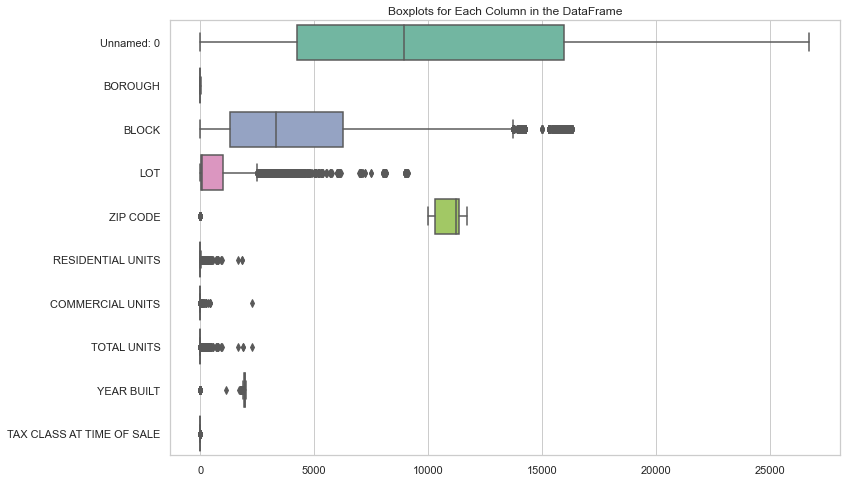

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Create boxplots for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=property_sales_df, orient="h", palette="Set2")
plt.title('Boxplots for Each Column in the DataFrame')
plt.show()

In [9]:
# Clean the 'SALE PRICE' column by replacing non-numeric values with NaN. There are '-'
property_sales_df['SALE PRICE'] = pd.to_numeric(property_sales_df['SALE PRICE'], errors='coerce')

# Convert the 'SALE PRICE' column to nullable integer type (Int64)
property_sales_df['SALE PRICE'] = property_sales_df['SALE PRICE'].astype('Int64')

In [10]:
print(property_sales_df['SALE PRICE'].unique())

<IntegerArray>
[ 6625000,     <NA>,  3936272,  8000000,  3192840, 16232000, 10350000,
        1,   499000,       10,
 ...
   681900,   412404,   239400,   441176,   306228,   774143,   523950,
   408092, 11693337,    69300]
Length: 10008, dtype: Int64


In [11]:
property_sales_df['SALE PRICE'].isna()

0        False
1         True
2         True
3        False
4        False
         ...  
84543    False
84544    False
84545    False
84546    False
84547    False
Name: SALE PRICE, Length: 84548, dtype: bool

In [12]:
null_count_before = property_sales_df['SALE PRICE'].isnull().sum()

In [13]:
# Drop null values from Sale Price column
property_sales_df.dropna(subset=['SALE PRICE'], inplace=True)

In [14]:
# Count null values after dropping
null_count_after = property_sales_df['SALE PRICE'].isnull().sum()

In [15]:
print(f'Null count before dropping: {null_count_before}')
print(f'Null count after dropping: {null_count_after}')

Null count before dropping: 14561
Null count after dropping: 0


<AxesSubplot:xlabel='SALE PRICE'>

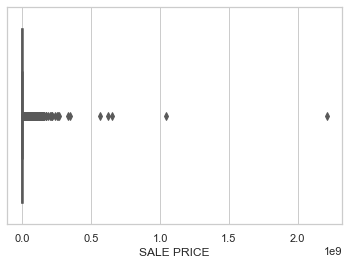

In [16]:
sns.boxplot(x=property_sales_df['SALE PRICE'], orient="h", palette="Set2")

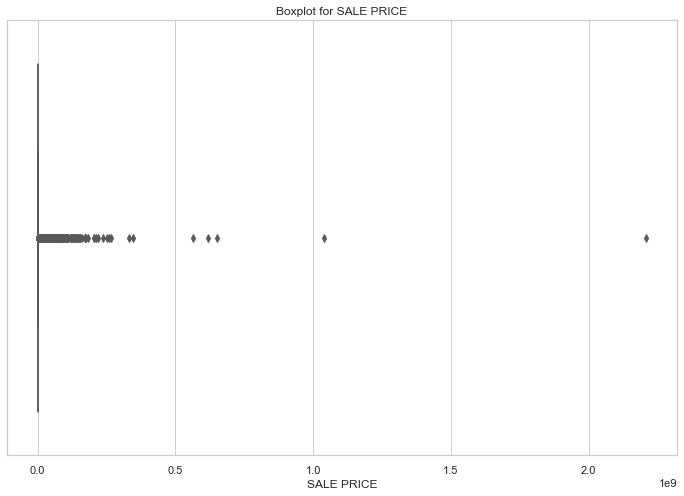

In [17]:

# Clean the 'SALE PRICE' column by replacing non-numeric values with NaN
property_sales_df['SALE PRICE'] = pd.to_numeric(property_sales_df['SALE PRICE'], errors='coerce')

# Convert the 'SALE PRICE' column to nullable integer type (Int64)
property_sales_df['SALE PRICE'] = property_sales_df['SALE PRICE'].astype('Int64')

# Drop missing values before creating the boxplot
property_sales_df_cleaned = property_sales_df.dropna(subset=['SALE PRICE'])

# Create boxplot for the 'SALE PRICE' column
plt.figure(figsize=(12, 8))
sns.boxplot(x=property_sales_df_cleaned['SALE PRICE'], orient="h", palette="Set2")
plt.title('Boxplot for SALE PRICE')
plt.show()

In [18]:
property_sales_df['SALE PRICE'].describe()

count    6.998700e+04
mean     1.276456e+06
std      1.140526e+07
min      0.000000e+00
25%      2.250000e+05
50%      5.300000e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [19]:
# Check the authenticity of the max 'Sale Price' value
property_sales_df[property_sales_df['SALE PRICE'] == 2.210000e+09]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7447,7451,1,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1301,1,,O4,245 PARK AVENUE,,10167,0,35,35,81336,1586886,1966,4,O4,2210000000,2017-05-05 00:00:00


In [20]:
property_sales_df[property_sales_df['SALE PRICE'] < 50000]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,10009,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
41,45,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2C,393,39,,C6,"163 AVENUE C, 2",,10009,0,0,0,-,-,1900,2,C6,25000,2017-06-14 00:00:00
207,211,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
208,212,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84301,8167,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,749,14,,B2,84 CRAFTON AVENUE,,10314,2,0,2,4200,1870,1920,1,B2,10,2017-02-24 00:00:00
84389,8255,5,WILLOWBROOK,05 TAX CLASS 1 VACANT LAND,1B,730,65,,V0,81 KELL AVENUE,,10314,0,0,0,2000,-,0,1,V0,20000,2017-01-04 00:00:00
84394,8260,5,WILLOWBROOK,44 CONDO PARKING,4,1965,1126,,RP,1235 FOREST HILL ROAD,P3,10314,0,0,1,-,-,2015,4,RP,5000,2017-04-28 00:00:00
84464,8330,5,WOODROW,01 ONE FAMILY DWELLINGS,1,7106,50,,A5,30 LORRAINE LOOP,,10309,1,0,1,1312,1570,1991,1,A5,3000,2017-01-14 00:00:00


In [21]:
property_sales_df[property_sales_df['SALE PRICE'] < 5000]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,10009,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
207,211,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
208,212,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
209,213,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84194,8060,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,735,153,,A1,32 CARMEL AVENUE,,10314,1,0,1,4000,1376,1925,1,A1,10,2017-05-12 00:00:00
84202,8068,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,744,14,,A2,78 ARDMORE AVENUE,,10314,1,0,1,4000,960,1950,1,A2,10,2017-07-27 00:00:00
84301,8167,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,749,14,,B2,84 CRAFTON AVENUE,,10314,2,0,2,4200,1870,1920,1,B2,10,2017-02-24 00:00:00
84464,8330,5,WOODROW,01 ONE FAMILY DWELLINGS,1,7106,50,,A5,30 LORRAINE LOOP,,10309,1,0,1,1312,1570,1991,1,A5,3000,2017-01-14 00:00:00


In [22]:
property_sales_df[property_sales_df['SALE PRICE'] < 500]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,10009,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
207,211,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
208,212,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
209,213,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84187,8053,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,734,13,,A2,64 KELL AVENUE,,10314,1,0,1,6000,864,1950,1,A2,10,2017-02-24 00:00:00
84194,8060,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,735,153,,A1,32 CARMEL AVENUE,,10314,1,0,1,4000,1376,1925,1,A1,10,2017-05-12 00:00:00
84202,8068,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,744,14,,A2,78 ARDMORE AVENUE,,10314,1,0,1,4000,960,1950,1,A2,10,2017-07-27 00:00:00
84301,8167,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,749,14,,B2,84 CRAFTON AVENUE,,10314,2,0,2,4200,1870,1920,1,B2,10,2017-02-24 00:00:00


In [23]:
property_sales_df[property_sales_df['SALE PRICE'] < 100]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,10009,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
207,211,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
208,212,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
209,213,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84187,8053,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,734,13,,A2,64 KELL AVENUE,,10314,1,0,1,6000,864,1950,1,A2,10,2017-02-24 00:00:00
84194,8060,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,735,153,,A1,32 CARMEL AVENUE,,10314,1,0,1,4000,1376,1925,1,A1,10,2017-05-12 00:00:00
84202,8068,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,744,14,,A2,78 ARDMORE AVENUE,,10314,1,0,1,4000,960,1950,1,A2,10,2017-07-27 00:00:00
84301,8167,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,749,14,,B2,84 CRAFTON AVENUE,,10314,2,0,2,4200,1870,1920,1,B2,10,2017-02-24 00:00:00


In [24]:
property_sales_df[property_sales_df['SALE PRICE'] < 50]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,10009,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
207,211,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
208,212,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
209,213,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84187,8053,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,734,13,,A2,64 KELL AVENUE,,10314,1,0,1,6000,864,1950,1,A2,10,2017-02-24 00:00:00
84194,8060,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,735,153,,A1,32 CARMEL AVENUE,,10314,1,0,1,4000,1376,1925,1,A1,10,2017-05-12 00:00:00
84202,8068,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,744,14,,A2,78 ARDMORE AVENUE,,10314,1,0,1,4000,960,1950,1,A2,10,2017-07-27 00:00:00
84301,8167,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,749,14,,B2,84 CRAFTON AVENUE,,10314,2,0,2,4200,1870,1920,1,B2,10,2017-02-24 00:00:00


In [25]:
property_sales_df[property_sales_df['SALE PRICE'] < 30]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,10009,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
207,211,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
208,212,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
209,213,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84187,8053,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,734,13,,A2,64 KELL AVENUE,,10314,1,0,1,6000,864,1950,1,A2,10,2017-02-24 00:00:00
84194,8060,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,735,153,,A1,32 CARMEL AVENUE,,10314,1,0,1,4000,1376,1925,1,A1,10,2017-05-12 00:00:00
84202,8068,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,744,14,,A2,78 ARDMORE AVENUE,,10314,1,0,1,4000,960,1950,1,A2,10,2017-07-27 00:00:00
84301,8167,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,749,14,,B2,84 CRAFTON AVENUE,,10314,2,0,2,4200,1870,1920,1,B2,10,2017-02-24 00:00:00


In [26]:
property_sales_df[property_sales_df['SALE PRICE'] < 20]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,10009,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
207,211,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
208,212,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
209,213,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84187,8053,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,734,13,,A2,64 KELL AVENUE,,10314,1,0,1,6000,864,1950,1,A2,10,2017-02-24 00:00:00
84194,8060,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,735,153,,A1,32 CARMEL AVENUE,,10314,1,0,1,4000,1376,1925,1,A1,10,2017-05-12 00:00:00
84202,8068,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,744,14,,A2,78 ARDMORE AVENUE,,10314,1,0,1,4000,960,1950,1,A2,10,2017-07-27 00:00:00
84301,8167,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,749,14,,B2,84 CRAFTON AVENUE,,10314,2,0,2,4200,1870,1920,1,B2,10,2017-02-24 00:00:00


In [27]:
property_sales_df[property_sales_df['SALE PRICE'] < 10]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
656,660,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,767,1110,,R4,257 WEST 17TH STREET,4A,10011,1,0,1,-,-,0,2,R4,1,2016-09-27 00:00:00
1653,1657,1,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1063,1129,,R4,425 W 53RD,310,10019,1,0,1,-,-,2007,2,R4,1,2016-12-12 00:00:00
3409,3413,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,876,1013,,R4,7 GRAMERCY PARK WEST,5A,10003,1,0,1,-,-,1913,2,R4,1,2016-11-08 00:00:00
3894,3898,1,GREENWICH VILLAGE-CENTRAL,13 CONDOS - ELEVATOR APARTMENTS,2,525,1714,,R4,184 THOMPSON,5U,10012,1,0,1,-,-,1910,2,R4,1,2017-07-25 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80138,4004,5,NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,66,58,,A2,168 WEST BUCHANAN STREET,,10301,1,0,1,5000,1092,1950,1,A2,1,2017-05-15 00:00:00
80881,4747,5,NEW SPRINGVILLE,01 ONE FAMILY DWELLINGS,1,2410,11,,A5,282 RICHMOND HILL ROAD,,10314,1,0,1,1110,1500,1987,1,A5,1,2017-01-09 00:00:00
83181,7047,5,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,1,,W1,715 OCEAN TERRACE,,10301,0,1,1,2128899,240,1965,4,W1,1,2016-11-14 00:00:00
83182,7048,5,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,301,,W1,MILFORD DRIVE,,0,0,1,1,78672,126468,1965,4,W1,1,2016-12-09 00:00:00


In [28]:
property_sales_df[property_sales_df['SALE PRICE'] < 5]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
656,660,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,767,1110,,R4,257 WEST 17TH STREET,4A,10011,1,0,1,-,-,0,2,R4,1,2016-09-27 00:00:00
1653,1657,1,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1063,1129,,R4,425 W 53RD,310,10019,1,0,1,-,-,2007,2,R4,1,2016-12-12 00:00:00
3409,3413,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,876,1013,,R4,7 GRAMERCY PARK WEST,5A,10003,1,0,1,-,-,1913,2,R4,1,2016-11-08 00:00:00
3894,3898,1,GREENWICH VILLAGE-CENTRAL,13 CONDOS - ELEVATOR APARTMENTS,2,525,1714,,R4,184 THOMPSON,5U,10012,1,0,1,-,-,1910,2,R4,1,2017-07-25 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80138,4004,5,NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,66,58,,A2,168 WEST BUCHANAN STREET,,10301,1,0,1,5000,1092,1950,1,A2,1,2017-05-15 00:00:00
80881,4747,5,NEW SPRINGVILLE,01 ONE FAMILY DWELLINGS,1,2410,11,,A5,282 RICHMOND HILL ROAD,,10314,1,0,1,1110,1500,1987,1,A5,1,2017-01-09 00:00:00
83181,7047,5,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,1,,W1,715 OCEAN TERRACE,,10301,0,1,1,2128899,240,1965,4,W1,1,2016-11-14 00:00:00
83182,7048,5,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,301,,W1,MILFORD DRIVE,,0,0,1,1,78672,126468,1965,4,W1,1,2016-12-09 00:00:00


In [29]:
cleaned_sales_price_df = property_sales_df[property_sales_df['SALE PRICE'] > 5000]

In [30]:
# New df without any unreasonable prices below $5,000.
cleaned_sales_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58514 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      58514 non-null  int64 
 1   BOROUGH                         58514 non-null  int64 
 2   NEIGHBORHOOD                    58514 non-null  object
 3   BUILDING CLASS CATEGORY         58514 non-null  object
 4   TAX CLASS AT PRESENT            58514 non-null  object
 5   BLOCK                           58514 non-null  int64 
 6   LOT                             58514 non-null  int64 
 7   EASE-MENT                       58514 non-null  object
 8   BUILDING CLASS AT PRESENT       58514 non-null  object
 9   ADDRESS                         58514 non-null  object
 10  APARTMENT NUMBER                58514 non-null  object
 11  ZIP CODE                        58514 non-null  int64 
 12  RESIDENTIAL UNITS               58514 non-null

In [31]:
cleaned_sales_price_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [32]:
cleaned_sales_price_df['BOROUGH'].value_counts()

4    18081
3    15294
1    14293
5     5850
2     4996
Name: BOROUGH, dtype: int64

In [33]:
property_sales_df[property_sales_df['SALE PRICE'] > 1300000000]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7447,7451,1,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1301,1,,O4,245 PARK AVENUE,,10167,0,35,35,81336,1586886,1966,4,O4,2210000000,2017-05-05 00:00:00


In [34]:
cleaned_sales_price_df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                         Int64
SALE DATE                         object
dtype: object

In [35]:
# Convert 'SALE DATE' from object to datetime
cleaned_sales_price_df['SALE DATE'] = pd.to_datetime(cleaned_sales_price_df['SALE DATE'])

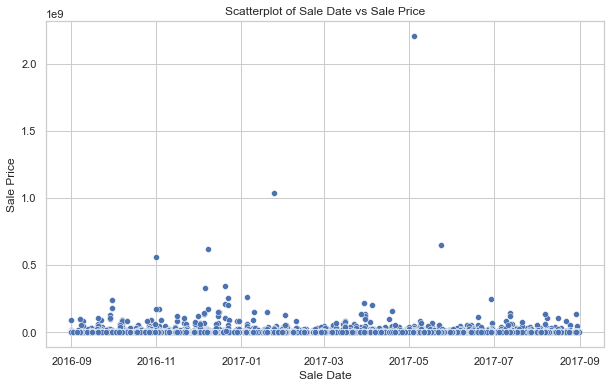

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='SALE DATE', y='SALE PRICE', data=cleaned_sales_price_df)

# Set plot labels and title
plt.xlabel('Sale Date')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Sale Date vs Sale Price')

# Show the plot
plt.show()

# Note that there is not a significant correlation between 'SALE PRICE' and 'SALE DATE'. 

In [37]:
cleaned_sales_price_df['BLOCK'].value_counts()

5066     388
16       202
2135     196
4978     181
170      131
        ... 
2465       1
11088      1
11090      1
11092      1
16316      1
Name: BLOCK, Length: 10482, dtype: int64

In [38]:
cleaned_sales_price_df['LOT'].value_counts()

1       3309
20       690
12       680
40       662
23       638
        ... 
3454       1
3469       1
3593       1
3605       1
679        1
Name: LOT, Length: 2356, dtype: int64

In [39]:
cleaned_sales_price_df['LAND SQUARE FEET'] = pd.to_numeric(cleaned_sales_price_df['LAND SQUARE FEET'], errors='coerce')

In [40]:
cleaned_sales_price_df['LAND SQUARE FEET'].isna().sum()

21012

In [41]:
cleaned_sales_price_df['LAND SQUARE FEET'].describe()

count    3.750200e+04
mean     3.715316e+03
std      4.426534e+04
min      0.000000e+00
25%      1.402000e+03
50%      2.208500e+03
75%      3.325000e+03
max      4.252327e+06
Name: LAND SQUARE FEET, dtype: float64

In [42]:
cleaned_sales_price_df[cleaned_sales_price_df['LAND SQUARE FEET'] < 100]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18354,52,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,10457,0,0,0,0.0,0,1935,2,D4,40000,2017-04-17
18355,53,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,10457,0,0,0,0.0,0,1935,2,D4,40000,2017-04-17
18356,54,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,10457,0,0,0,0.0,0,1941,2,D4,60000,2016-12-01
18746,444,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,10469,1,0,1,0.0,0,2008,1,R3,310000,2017-02-28
18747,445,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,10469,1,0,1,0.0,0,2008,1,R3,342500,2017-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49377,24026,3,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,3238,1025,,R4,101 WYCKOFF AVENUE,4A,11237,1,0,1,0.0,0,0,2,R4,527000,2017-03-27
49378,24027,3,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,3248,1013,,R4,1610 DEKALB AVENUE,5A,11237,1,0,1,0.0,0,0,2,R4,910000,2017-05-03
49379,24028,3,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,3248,1015,,R4,1610 DEKALB AVENUE,5C,11237,1,0,1,0.0,0,0,2,R4,934000,2017-06-19
49380,24029,3,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,3328,1015,,R4,358 GROVE ST,4E,11237,1,0,1,0.0,0,0,2,R4,499998,2017-02-22


In [43]:
# Replace null values with 0
cleaned_sales_price_df['LAND SQUARE FEET'] = cleaned_sales_price_df['LAND SQUARE FEET'].fillna(0)


In [44]:

cleaned_sales_price_df[cleaned_sales_price_df['LAND SQUARE FEET'] < 100]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,0.0,-,1920,2,C6,499000,2017-03-10
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",,10009,0,0,0,0.0,-,1920,2,C6,529500,2017-06-09
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",,10009,0,0,0,0.0,-,1920,2,C6,423000,2017-07-14
17,21,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,46,,C6,"317 EAST 3RD STREET, 12",,10009,0,0,0,0.0,-,1925,2,C6,501000,2017-03-16
18,22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,,C6,"311 EAST 3RD STREET, 17",,10009,0,0,0,0.0,-,1920,2,C6,450000,2016-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84382,8248,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,1965,1122,,R3,1235 FOREST HILL ROAD,2L,10314,1,0,1,0.0,-,2015,1,R3,430950,2017-06-01
84383,8249,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2086,1009,,R3,39 DREYER AVENUE,,10314,1,0,1,0.0,-,1979,1,R3,415500,2016-10-31
84384,8250,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1002,,R3,392 HAWTHORNE AVENUE,,10314,1,0,1,0.0,-,1980,1,R3,335000,2016-10-20
84385,8251,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1021,,R3,418 HAWTHORNE AVENUE,,10314,1,0,1,0.0,-,1980,1,R3,420000,2016-12-29


In [45]:
cleaned_sales_price_df['GROSS SQUARE FEET'] = pd.to_numeric(cleaned_sales_price_df['GROSS SQUARE FEET'], errors='coerce')

In [46]:
cleaned_sales_price_df['GROSS SQUARE FEET'].isna().sum()

21540

In [47]:
cleaned_sales_price_df['GROSS SQUARE FEET'].describe()

count    3.697400e+04
mean     3.531155e+03
std      2.996708e+04
min      0.000000e+00
25%      8.680000e+02
50%      1.550000e+03
75%      2.341750e+03
max      3.750565e+06
Name: GROSS SQUARE FEET, dtype: float64

In [48]:
cleaned_sales_price_df['GROSS SQUARE FEET'] = cleaned_sales_price_df['GROSS SQUARE FEET'].fillna(0)


In [49]:
cleaned_sales_price_df[cleaned_sales_price_df['GROSS SQUARE FEET'] < 100]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,0.0,0.0,1920,2,C6,499000,2017-03-10
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",,10009,0,0,0,0.0,0.0,1920,2,C6,529500,2017-06-09
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",,10009,0,0,0,0.0,0.0,1920,2,C6,423000,2017-07-14
17,21,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,46,,C6,"317 EAST 3RD STREET, 12",,10009,0,0,0,0.0,0.0,1925,2,C6,501000,2017-03-16
18,22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,,C6,"311 EAST 3RD STREET, 17",,10009,0,0,0,0.0,0.0,1920,2,C6,450000,2016-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84383,8249,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2086,1009,,R3,39 DREYER AVENUE,,10314,1,0,1,0.0,0.0,1979,1,R3,415500,2016-10-31
84384,8250,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1002,,R3,392 HAWTHORNE AVENUE,,10314,1,0,1,0.0,0.0,1980,1,R3,335000,2016-10-20
84385,8251,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1021,,R3,418 HAWTHORNE AVENUE,,10314,1,0,1,0.0,0.0,1980,1,R3,420000,2016-12-29
84388,8254,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2089,1006,,R3,18 DARCEY AVENUE,,10314,1,0,1,0.0,0.0,1980,1,R3,407000,2016-10-13


In [50]:
cleaned_sales_price_df[(cleaned_sales_price_df['LAND SQUARE FEET'] < 100)\
                       & (cleaned_sales_price_df['GROSS SQUARE FEET'] < 100)]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,0.0,0.0,1920,2,C6,499000,2017-03-10
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",,10009,0,0,0,0.0,0.0,1920,2,C6,529500,2017-06-09
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",,10009,0,0,0,0.0,0.0,1920,2,C6,423000,2017-07-14
17,21,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,46,,C6,"317 EAST 3RD STREET, 12",,10009,0,0,0,0.0,0.0,1925,2,C6,501000,2017-03-16
18,22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,,C6,"311 EAST 3RD STREET, 17",,10009,0,0,0,0.0,0.0,1920,2,C6,450000,2016-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84382,8248,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,1965,1122,,R3,1235 FOREST HILL ROAD,2L,10314,1,0,1,0.0,0.0,2015,1,R3,430950,2017-06-01
84383,8249,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2086,1009,,R3,39 DREYER AVENUE,,10314,1,0,1,0.0,0.0,1979,1,R3,415500,2016-10-31
84384,8250,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1002,,R3,392 HAWTHORNE AVENUE,,10314,1,0,1,0.0,0.0,1980,1,R3,335000,2016-10-20
84385,8251,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1021,,R3,418 HAWTHORNE AVENUE,,10314,1,0,1,0.0,0.0,1980,1,R3,420000,2016-12-29


In [51]:

condition = (cleaned_sales_price_df['LAND SQUARE FEET'] < 100) & (cleaned_sales_price_df['GROSS SQUARE FEET'] < 100)

# Display only rows that satisfy the condition
filtered_rows = cleaned_sales_price_df[condition]
print(filtered_rows)


       Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
13             17        1  ALPHABET CITY   
15             19        1  ALPHABET CITY   
16             20        1  ALPHABET CITY   
17             21        1  ALPHABET CITY   
18             22        1  ALPHABET CITY   
...           ...      ...            ...   
84382        8248        5    WILLOWBROOK   
84383        8249        5    WILLOWBROOK   
84384        8250        5    WILLOWBROOK   
84385        8251        5    WILLOWBROOK   
84388        8254        5    WILLOWBROOK   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
13     09 COOPS - WALKUP APARTMENTS                                   2   
15     09 COOPS - WALKUP APARTMENTS                                   2   
16     09 COOPS - WALKUP APARTMENTS                                   2   
17     09 COOPS - WALKUP APARTMENTS                                   2   
18     09 COOPS - WALKUP APARTMENTS                                   2   
...      

# It is the same 29,079 rows which have 0 values for both Land Square Feet and Gross Square Feet.

In [52]:
# Create sales_price_df with land and gross square feet more than 100.
cleaned_area_sales_df = cleaned_sales_price_df[(cleaned_sales_price_df['LAND SQUARE FEET'] > 0)\
                                               & (cleaned_sales_price_df['GROSS SQUARE FEET'] > 0)]
cleaned_area_sales_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000,2017-07-19
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000,2016-11-17
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840,2016-09-23
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000,2016-11-07


In [53]:
cleaned_area_sales_df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000,2017-07-19
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000,2016-11-17
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840,2016-09-23
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000,2016-11-28
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000,2017-04-21
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000,2017-07-05
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337,2016-12-21


In [54]:
cleaned_area_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28453 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      28453 non-null  int64         
 1   BOROUGH                         28453 non-null  int64         
 2   NEIGHBORHOOD                    28453 non-null  object        
 3   BUILDING CLASS CATEGORY         28453 non-null  object        
 4   TAX CLASS AT PRESENT            28453 non-null  object        
 5   BLOCK                           28453 non-null  int64         
 6   LOT                             28453 non-null  int64         
 7   EASE-MENT                       28453 non-null  object        
 8   BUILDING CLASS AT PRESENT       28453 non-null  object        
 9   ADDRESS                         28453 non-null  object        
 10  APARTMENT NUMBER                28453 non-null  object        
 11  ZI

In [55]:
# Choose appropriate columns to study
selected_columns = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
                    'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

real_estate_price_df = cleaned_area_sales_df[selected_columns]
real_estate_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28453 entries, 0 to 84547
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BOROUGH            28453 non-null  int64  
 1   BLOCK              28453 non-null  int64  
 2   LOT                28453 non-null  int64  
 3   ZIP CODE           28453 non-null  int64  
 4   RESIDENTIAL UNITS  28453 non-null  int64  
 5   COMMERCIAL UNITS   28453 non-null  int64  
 6   TOTAL UNITS        28453 non-null  int64  
 7   LAND SQUARE FEET   28453 non-null  float64
 8   GROSS SQUARE FEET  28453 non-null  float64
 9   SALE PRICE         28453 non-null  Int64  
dtypes: Int64(1), float64(2), int64(7)
memory usage: 2.4 MB


In [56]:
real_estate_price_df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,2.845300e+04,2.845300e+04,2.845300e+04
mean,3.538537,5555.606228,61.770639,10994.419253,3.044811,0.334692,3.378062,4.263804e+03,4.583389e+03,1.689635e+06
std,1.018337,3777.336518,125.348953,514.698802,20.225415,14.230857,24.867375,3.814195e+04,3.408755e+04,1.725257e+07
min,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02,1.200000e+02,5.700000e+03
25%,3.000000,2690.000000,19.000000,10462.000000,1.000000,0.000000,1.000000,2.000000e+03,1.360000e+03,4.350000e+05
50%,4.000000,4918.000000,38.000000,11221.000000,2.000000,0.000000,2.000000,2.500000e+03,1.872000e+03,6.350000e+05
75%,4.000000,7837.000000,64.000000,11373.000000,2.000000,0.000000,2.000000,4.000000e+03,2.666000e+03,9.700000e+05
max,5.000000,16319.000000,7501.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09


In [57]:
real_estate_price_df['ZIP CODE'].value_counts()

10314    841
10312    745
10306    645
11234    642
11434    515
        ... 
10044      1
10803      1
10006      1
10167      1
11005      1
Name: ZIP CODE, Length: 179, dtype: int64

In [58]:
real_estate_price_df.isna().sum()

BOROUGH              0
BLOCK                0
LOT                  0
ZIP CODE             0
RESIDENTIAL UNITS    0
COMMERCIAL UNITS     0
TOTAL UNITS          0
LAND SQUARE FEET     0
GROSS SQUARE FEET    0
SALE PRICE           0
dtype: int64

In [59]:
real_estate_price_df[(real_estate_price_df['RESIDENTIAL UNITS'] == 0)\
                      & (real_estate_price_df['COMMERCIAL UNITS'] == 0)]

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
5603,1,1771,44,10035,0,0,0,5973.0,24626.0,330000
21238,2,4036,16,10462,0,0,0,2375.0,432.0,20000
21240,2,4051,14,10462,0,0,0,2375.0,684.0,80000
26430,3,5941,40,11209,0,0,0,1808.0,5160.0,2800000
30100,3,5602,21,11219,0,0,0,2684.0,3943.0,85000
31045,3,229,10,11201,0,0,0,8530.0,29952.0,18000000
32125,3,3408,5,11207,0,0,0,7840.0,9520.0,500000
35155,3,3664,52,11207,0,0,0,2500.0,800.0,150000
37133,3,4522,20,11208,0,0,0,7878.0,6000.0,2000000
37153,3,4327,24,11207,0,0,0,19000.0,42112.0,10975000


In [60]:
# Check to ensure no 0 values for TOTAL UNITS
real_estate_price_df['TOTAL UNITS'].describe()

count    28453.000000
mean         3.378062
std         24.867375
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max       2261.000000
Name: TOTAL UNITS, dtype: float64

In [61]:
# Further reduce df to exclude rows with 0 RESIDENTIAL and 0 COMMERCIAL UNITS
real_estate_price_df = real_estate_price_df[(real_estate_price_df['RESIDENTIAL UNITS'] != 0)\
                      | (real_estate_price_df['COMMERCIAL UNITS'] != 0)]
real_estate_price_df

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
0,1,392,6,10009,5,0,5,1633.0,6440.0,6625000
3,1,402,21,10009,10,0,10,2272.0,6794.0,3936272
4,1,404,55,10009,6,0,6,2369.0,4615.0,8000000
6,1,406,32,10009,8,0,8,1750.0,4226.0,3192840
9,1,387,153,10009,24,0,24,4489.0,18523.0,16232000
...,...,...,...,...,...,...,...,...,...,...
84543,5,7349,34,10309,2,0,2,2400.0,2575.0,450000
84544,5,7349,78,10309,2,0,2,2498.0,2377.0,550000
84545,5,7351,60,10309,2,0,2,4000.0,1496.0,460000
84546,5,7100,28,10309,0,7,7,208033.0,64117.0,11693337


In [62]:
# Check correlations
real_estate_price_df.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,1.000000,0.163071,0.023887,0.076966,-0.104796,-0.011437,-0.091748,0.006034,-0.107883,-0.102624
BLOCK,0.163071,1.000000,0.042334,0.466126,-0.055977,-0.006316,-0.049134,-0.005711,-0.064526,-0.065475
LOT,0.023887,0.042334,1.000000,-0.089428,-0.009030,-0.004537,-0.009936,0.009179,-0.009274,-0.010423
ZIP CODE,0.076966,0.466126,-0.089428,1.000000,-0.057055,-0.003570,-0.048428,-0.021230,-0.070754,-0.060251
RESIDENTIAL UNITS,-0.104796,-0.055977,-0.009030,-0.057055,1.000000,0.011839,0.820093,0.515057,0.719258,0.138785
COMMERCIAL UNITS,-0.011437,-0.006316,-0.004537,-0.003570,0.011839,1.000000,0.581891,0.061241,0.065629,0.047692
TOTAL UNITS,-0.091748,-0.049134,-0.009936,-0.048428,0.820093,0.581891,1.000000,0.453959,0.622550,0.140165
LAND SQUARE FEET,0.006034,-0.005711,0.009179,-0.021230,0.515057,0.061241,0.453959,1.000000,0.713018,0.044271
GROSS SQUARE FEET,-0.107883,-0.064526,-0.009274,-0.070754,0.719258,0.065629,0.622550,0.713018,1.000000,0.518397
SALE PRICE,-0.102624,-0.065475,-0.010423,-0.060251,0.138785,0.047692,0.140165,0.044271,0.518397,1.000000


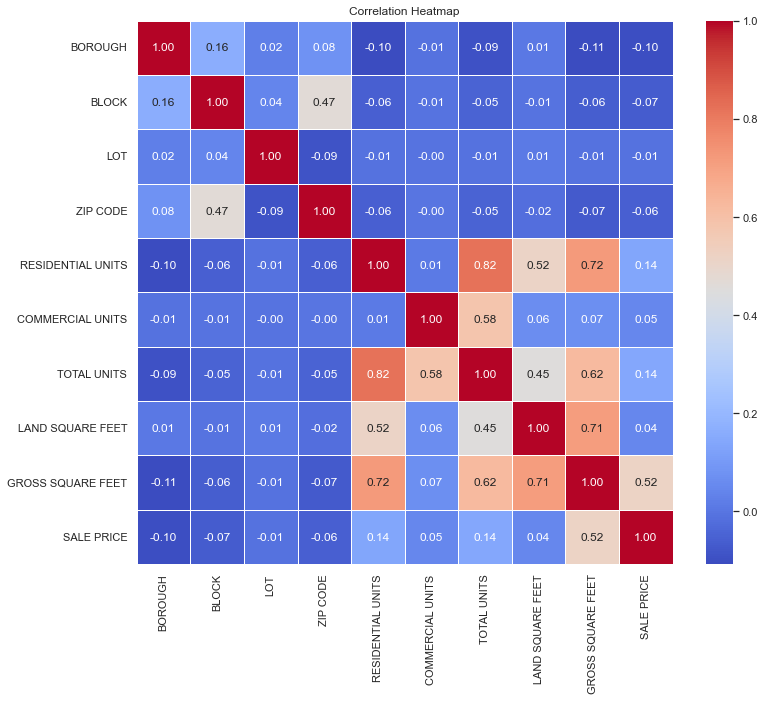

In [63]:
# Create heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(real_estate_price_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.9)

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

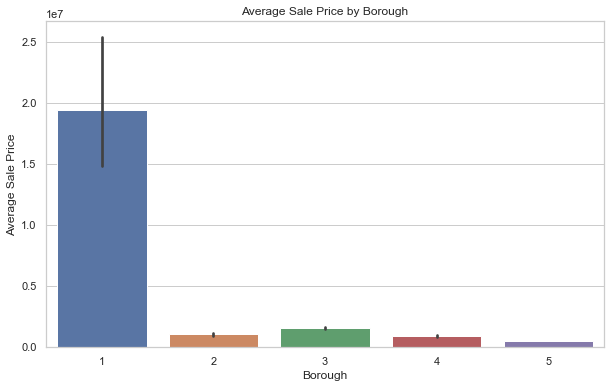

In [64]:

sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='BOROUGH', y='SALE PRICE', data = real_estate_price_df, estimator=lambda x: sum(x) / len(x))

# Set labels and title
plt.xlabel('Borough')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Borough')

# Show the plot
plt.show()


# 1=Manhattan has the highest average sale price by a lot.

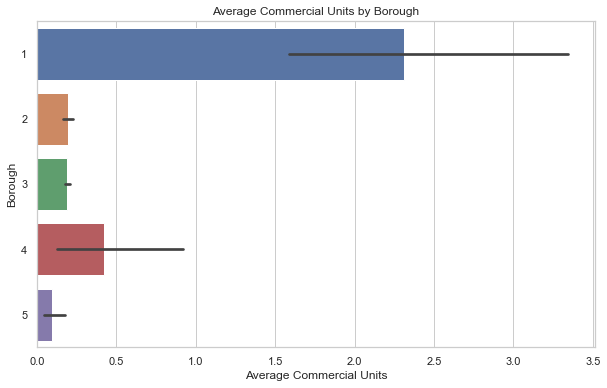

In [65]:
sns.set(style="whitegrid")

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='COMMERCIAL UNITS', y='BOROUGH', data=real_estate_price_df, estimator=lambda x: sum(x) / len(x), orient='h')

# Set labels and title
plt.xlabel('Average Commercial Units')
plt.ylabel('Borough')
plt.title('Average Commercial Units by Borough')

# Show the plot
plt.show()

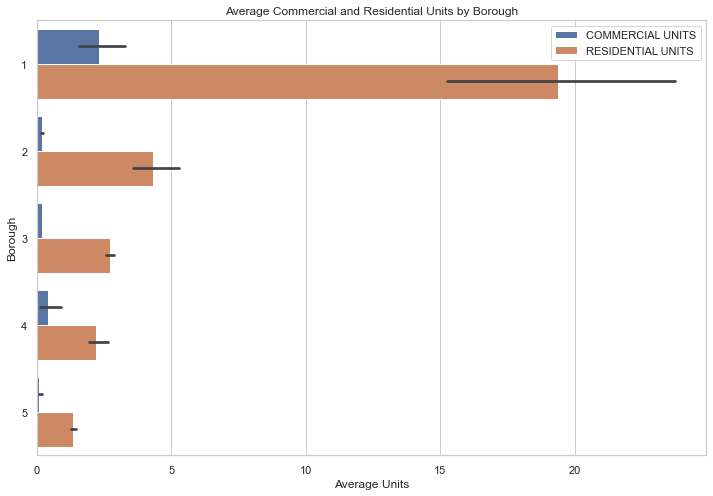

In [66]:
sns.set(style="whitegrid")

# Melt the DataFrame to plot both Commercial and Residential Units
melted_df = real_estate_price_df.melt(id_vars='BOROUGH', value_vars=['COMMERCIAL UNITS', 'RESIDENTIAL UNITS'],
                                      var_name='Unit Type', value_name='Average Units')

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Units', y='BOROUGH', hue='Unit Type', data=melted_df, orient='h')

# Set labels and title
plt.xlabel('Average Units')
plt.ylabel('Borough')
plt.title('Average Commercial and Residential Units by Borough')

# Show the legend
plt.legend()

# Show the plot
plt.show()

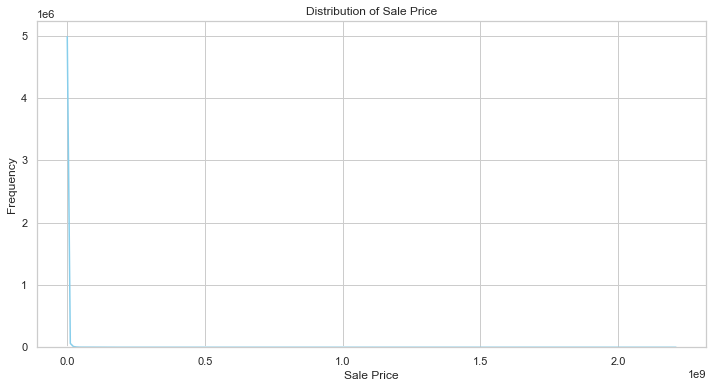

In [67]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a distribution plot for 'SALE PRICE'
sns.histplot(real_estate_price_df['SALE PRICE'], bins=2, kde=True, color='skyblue')

# Set labels and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')

# Show the plot
plt.show()

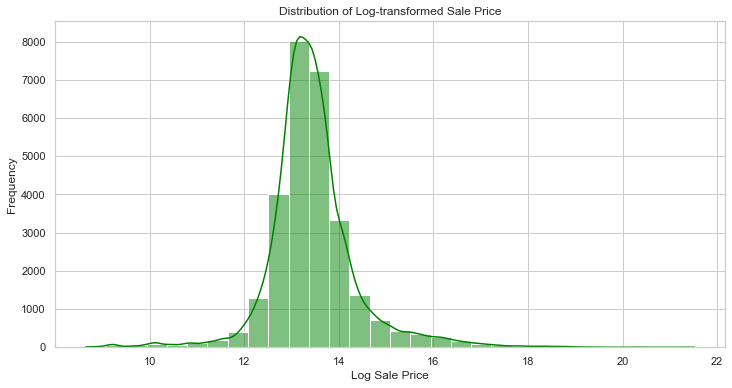

In [68]:
# Use log to better visualize
import numpy as np
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Take the logarithm of 'SALE PRICE'
real_estate_price_df['LOG SALE PRICE'] = np.log1p(real_estate_price_df['SALE PRICE'])

# Create a distribution plot for log-transformed 'SALE PRICE'
sns.histplot(real_estate_price_df['LOG SALE PRICE'], bins=30, kde=True, color='green')

# Set labels and title
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log-transformed Sale Price')

# Show the plot
plt.show()

In [69]:
# Check if 'LOG SALE PRICE' column exists before dropping
if 'LOG SALE PRICE' in real_estate_price_df.columns:
    real_estate_price_df = real_estate_price_df.drop('LOG SALE PRICE', axis=1)
else:
    print("'LOG SALE PRICE' column not found.")


In [70]:


# Filter the DataFrame for rows where borough is 1
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 1]

# Calculate the mean of residential units
mean_residential_units = filtered_df['RESIDENTIAL UNITS'].mean()

# Print the result
print(f"The mean of residential units in Manhattan is: {mean_residential_units}")


The mean of residential units in Manhattan is: 19.391666666666666


In [71]:
# Filter the DataFrame for rows where borough is 1
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 1]

# Calculate the mean of residential units
mean_commercial_units = filtered_df['COMMERCIAL UNITS'].mean()

# Print the result
print(f"The mean of commercial units in Manhattan is: {mean_commercial_units}")

The mean of commercial units in Manhattan is: 2.309375


In [72]:
# Filter the DataFrame for rows where borough is 1
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 2]

# Calculate the mean of residential units
mean_residential_units = filtered_df['RESIDENTIAL UNITS'].mean()

# Print the result
print(f"The mean of residential units in Bronx is: {mean_residential_units}")

The mean of residential units in Bronx is: 4.335684891240446


In [73]:
# Filter the DataFrame for rows where borough is 1
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 2]

# Calculate the mean of residential units
mean_commercial_units = filtered_df['COMMERCIAL UNITS'].mean()

# Print the result
print(f"The mean of residential units in Bronx is: {mean_commercial_units}")

The mean of residential units in Bronx is: 0.1966490299823633


In [81]:
# Filter the DataFrame for rows where borough is 1
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 3]

# Calculate the mean of residential units
mean_residential_units = filtered_df['RESIDENTIAL UNITS'].mean()

# Print the result
print(f"The mean of residential units in Brooklyn is: {mean_residential_units}")

The mean of residential units in Brooklyn is: 2.716373218349503


In [80]:
# Filter the DataFrame for rows where borough is 1
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 3]

# Calculate the mean of residential units
mean_commercial_units = filtered_df['COMMERCIAL UNITS'].mean()

# Print the result
print(f"The mean of commercial units in Brooklyn is: {mean_commercial_units}")

The mean of commercial units in Brooklyn is: 0.19187926697808122


In [76]:
# Filter the DataFrame for rows where borough is 1
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 4]

# Calculate the mean of residential units
mean_residential_units = filtered_df['RESIDENTIAL UNITS'].mean()

# Print the result
print(f"The mean of residential units in Queens is: {mean_residential_units}")

The mean of residential units in Queens is: 2.2180569731836317


In [79]:
# Filter the DataFrame for rows where borough is 1
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 4]

# Calculate the mean of residential units
mean_commercial_units = filtered_df['COMMERCIAL UNITS'].mean()

# Print the result
print(f"The mean of commercial units in Queens is: {mean_commercial_units}")

The mean of commercial units in Queens is: 0.4221954161640531


In [74]:
# Filter the DataFrame for rows where borough is 5
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 5]

# Calculate the mean of residential units
mean_residential_units = filtered_df['RESIDENTIAL UNITS'].mean()

# Print the result
print(f"The mean of residential units in Staten Island is: {mean_residential_units}")

The mean of residential units in Staten Island is: 1.3568094174954333


In [78]:
# Filter the DataFrame for rows where borough is 5
filtered_df = real_estate_price_df[real_estate_price_df['BOROUGH'] == 5]

# Calculate the mean of residential units
mean_commercial_units = filtered_df['COMMERCIAL UNITS'].mean()

# Print the result
print(f"The mean of commercial units in Staten Island is: {mean_commercial_units}")

The mean of commercial units in Staten Island is: 0.09843718286990055


# Try feature selection

In [70]:
# Variance threshold
from sklearn.feature_selection import VarianceThreshold


# Extracting the feature matrix (X) excluding non-numeric columns
X = real_estate_price_df.select_dtypes(include=['int64', 'float64'])

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.8)
selected_features = selector.fit_transform(X)

# Convert the selected features back to a DataFrame
selected_features_variance_df = pd.DataFrame(selected_features, columns=X.columns[selector.get_support()])

# Display the selected features
print(selected_features_variance_df.head())


   BOROUGH  BLOCK    LOT  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
0      1.0  392.0    6.0   10009.0                5.0               0.0   
1      1.0  402.0   21.0   10009.0               10.0               0.0   
2      1.0  404.0   55.0   10009.0                6.0               0.0   
3      1.0  406.0   32.0   10009.0                8.0               0.0   
4      1.0  387.0  153.0   10009.0               24.0               0.0   

   TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  
0          5.0            1633.0             6440.0   6625000.0  
1         10.0            2272.0             6794.0   3936272.0  
2          6.0            2369.0             4615.0   8000000.0  
3          8.0            1750.0             4226.0   3192840.0  
4         24.0            4489.0            18523.0  16232000.0  


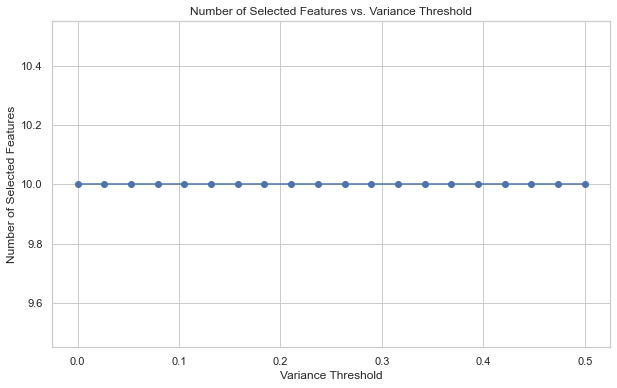

In [71]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import matplotlib.pyplot as plt

threshold_values = np.linspace(0, 0.5, 20)  

selected_features_count = []

for threshold in threshold_values:
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X)
    selected_features_count.append(X_selected.shape[1])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, selected_features_count, marker='o', linestyle='-', color='b')
plt.title('Number of Selected Features vs. Variance Threshold')
plt.xlabel('Variance Threshold')
plt.ylabel('Number of Selected Features')
plt.grid(True)
plt.show()


In [72]:
# Try feature selection with variance threshold after normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.0001)
X_selected = selector.fit_transform(X_normalized)
# Convert the selected features back to a DataFrame
selected_features_variance_df = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])

# Display the selected features
print(selected_features_variance_df.head())



   BOROUGH     BLOCK       LOT  ZIP CODE  RESIDENTIAL UNITS  TOTAL UNITS
0      0.0  0.023722  0.001348  0.855909           0.002711     0.001770
1      0.0  0.024335  0.005392  0.855909           0.005423     0.003982
2      0.0  0.024458  0.014559  0.855909           0.003254     0.002212
3      0.0  0.024580  0.008358  0.855909           0.004338     0.003097
4      0.0  0.023415  0.040981  0.855909           0.013015     0.010177


In [73]:

# Try feature selection with variance threshold after normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.001)
X_selected = selector.fit_transform(X_normalized)
# Convert the selected features back to a DataFrame
selected_features_variance_df = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])

# Display the selected features
print(selected_features_variance_df.head())


   BOROUGH     BLOCK       LOT  ZIP CODE
0      0.0  0.023722  0.001348  0.855909
1      0.0  0.024335  0.005392  0.855909
2      0.0  0.024458  0.014559  0.855909
3      0.0  0.024580  0.008358  0.855909
4      0.0  0.023415  0.040981  0.855909


In [74]:
real_estate_price_df['BLOCK'].value_counts()

1009     60
4452     57
2873     30
6979     24
1602     24
         ..
10477     1
10328     1
10834     1
10352     1
392       1
Name: BLOCK, Length: 9815, dtype: int64

In [75]:
real_estate_price_df['LOT'].value_counts()

1      676
12     422
20     422
21     421
22     415
      ... 
514      1
604      1
893      1
900      1
679      1
Name: LOT, Length: 664, dtype: int64

In [76]:
print(X.dtypes)


BOROUGH                int64
BLOCK                  int64
LOT                    int64
ZIP CODE               int64
RESIDENTIAL UNITS      int64
COMMERCIAL UNITS       int64
TOTAL UNITS            int64
LAND SQUARE FEET     float64
GROSS SQUARE FEET    float64
SALE PRICE             Int64
dtype: object


In [70]:
# One-hot encode BOROUGH column

real_estate_price_df_encoded = pd.get_dummies(real_estate_price_df, columns=['BOROUGH'], prefix='BOROUGH')

# Display the resulting DataFrame
print(real_estate_price_df_encoded.head())


   BLOCK  LOT  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0    392    6     10009                  5                 0            5   
3    402   21     10009                 10                 0           10   
4    404   55     10009                  6                 0            6   
6    406   32     10009                  8                 0            8   
9    387  153     10009                 24                 0           24   

   LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  BOROUGH_1  BOROUGH_2  \
0            1633.0             6440.0     6625000          1          0   
3            2272.0             6794.0     3936272          1          0   
4            2369.0             4615.0     8000000          1          0   
6            1750.0             4226.0     3192840          1          0   
9            4489.0            18523.0    16232000          1          0   

   BOROUGH_3  BOROUGH_4  BOROUGH_5  
0          0          0          0  
3     

In [71]:
# Drop BLOCK, LOT, ZIP CODE columns
real_estate_price_df_encoded = real_estate_price_df_encoded.drop(columns=['BLOCK', 'LOT', 'ZIP CODE'])
real_estate_price_df_encoded.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5
0,5,0,5,1633.0,6440.0,6625000,1,0,0,0,0
3,10,0,10,2272.0,6794.0,3936272,1,0,0,0,0
4,6,0,6,2369.0,4615.0,8000000,1,0,0,0,0
6,8,0,8,1750.0,4226.0,3192840,1,0,0,0,0
9,24,0,24,4489.0,18523.0,16232000,1,0,0,0,0


In [79]:
# Try PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = real_estate_price_df_encoded.drop('SALE PRICE', axis=1)
y = real_estate_price_df_encoded['SALE PRICE']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the target variable to the PCA DataFrame
pca_df['SALE PRICE'] = y.values

# Display the resulting DataFrame with principal components and target variable
print(pca_df.head())


   Principal Component 1  Principal Component 2  SALE PRICE
0               0.773478              -0.280769     6625000
1               1.014380              -0.278699     3936272
2               0.801329              -0.279847     8000000
3               0.878845              -0.279311     3192840
4               1.852813              -0.274172    16232000


In [80]:
# Try PCA Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_pca, y)

LinearRegression()

In [81]:
# PCA Linear Regression Model and Metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.decomposition import PCA

# Assuming X_pca is your principal components and y is your target variable (SALE PRICE)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_err}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 44696143299317.2
Mean Absolute Error (MAE): 1227557.9741111465
R-squared (R2): 0.10395883323056421
Explained Variance Score: 0.10483310982341232
Maximum Residual Error: 312251525.8804871
Median Absolute Error: 758104.4004410149


In [82]:
# Try Random Forest on PCA
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_pca, y)

RandomForestRegressor()

In [83]:
# PCA Random Forest and Metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.decomposition import PCA

# Assuming X_pca is your principal components and y is your target variable (SALE PRICE)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_err}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 34038452827932.94
Mean Absolute Error (MAE): 843683.3815387599
R-squared (R2): 0.31761774650849217
Explained Variance Score: 0.317675413112083
Maximum Residual Error: 269650484.42
Median Absolute Error: 190011.10349999997


In [84]:
# Try Gradient Boosting on PCA
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_pca, y)


GradientBoostingRegressor()

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.decomposition import PCA

# Assuming X_pca is your principal components and y is your target variable (SALE PRICE)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_err}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 65248498095812.336
Mean Absolute Error (MAE): 949578.7345466504
R-squared (R2): -0.30806230802061463
Explained Variance Score: -0.30801578022817044
Maximum Residual Error: 411128520.50406146
Median Absolute Error: 265579.3603843944


In [86]:
# Try SVR on PCA
from sklearn.svm import SVR
model = SVR()
model.fit(X_pca, y)


SVR()

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.decomposition import PCA

# Assuming X_pca is your PCA-transformed data and y is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create SVR model
svr_model = SVR()

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Maximum Residual Error: {max_err}")
print(f"Median Absolute Error: {medae}")


Mean Squared Error (MSE): 50467174064776.16
Mean Absolute Error (MAE): 993620.1887153324
R-squared (R2): -0.011735290665426223
Explained Variance Score: 1.6675110267150295e-05
Maximum Residual Error: 329364051.6897238
Median Absolute Error: 239885.00726245693


In [88]:
import numpy as np

# Convert y to a numeric format to become a tensor
y = y.astype(np.float32)



In [89]:
'''
# Try Neural Network on PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(units=64, activation='relu', input_dim=2),  # Adjust input_dim based on the number of principal components
    Dense(units=1)  # Output layer for regression
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_pca, y, epochs=100, batch_size=32)
'''


"\n# Try Neural Network on PCA\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nmodel = Sequential([\n    Dense(units=64, activation='relu', input_dim=2),  # Adjust input_dim based on the number of principal components\n    Dense(units=1)  # Output layer for regression\n])\nmodel.compile(optimizer='adam', loss='mean_squared_error')\nmodel.fit(X_pca, y, epochs=100, batch_size=32)\n"

In [90]:
'''
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.decomposition import PCA

# Assuming X_pca is your PCA-transformed data and y is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # You can use different optimizers and loss functions based on your preference

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Make predictions on the test set
y_pred = model.predict(X_test).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Maximum Residual Error: {max_err}")
print(f"Median Absolute Error: {medae}")
'''


'\nimport tensorflow as tf\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error\nfrom sklearn.decomposition import PCA\n\n# Assuming X_pca is your PCA-transformed data and y is the target variable\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)\n\n# Build the neural network model\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Dense(128, activation=\'relu\', input_shape=(X_train.shape[1],)),\n    tf.keras.layers.Dense(64, activation=\'relu\'),\n    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression\n])\n\n# Compile the model\nmodel.compile(optimizer=\'adam\', loss=\'mean_squared_error\')  # You can use different optimizers and loss functions based on your preference\n\n# Train the model\nmodel.fit(X_train, y_train, epochs=50, b

# Try Linear Regression as baseline model 

In [72]:
# Linear Regression on all Features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

X = real_estate_price_df_encoded[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH_1', 'BOROUGH_2', 'BOROUGH_3', 'BOROUGH_4', 'BOROUGH_5']]
y = real_estate_price_df_encoded['SALE PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Explained Variance Score: {explained_var:.2f}')
print(f'Maximum Residual Error: {max_residual:.2f}')
print(f'Median Absolute Error: {median_ae:.2f}')



Mean Squared Error (MSE): 155075890534185.97
Mean Absolute Error (MAE): 1726621.12
R-squared (R2): 0.49
Explained Variance Score: 0.49
Maximum Residual Error: 510472987.36
Median Absolute Error: 504764.67


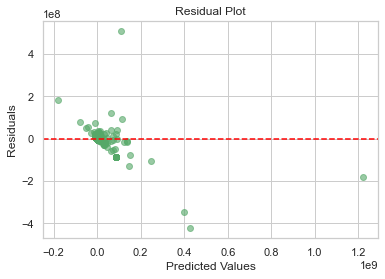

In [105]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.scatter(y_pred, residuals, c='g', alpha=0.6)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()


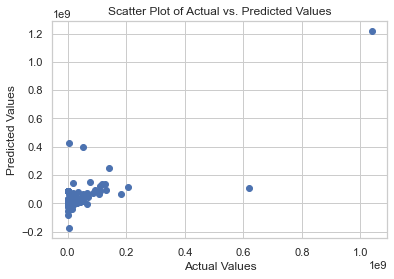

In [106]:
# Scatter Plot
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

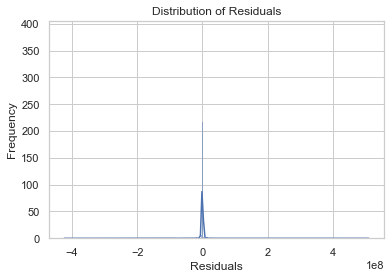

In [107]:
# Distribution Plot
sns.histplot(y_test - y_pred, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

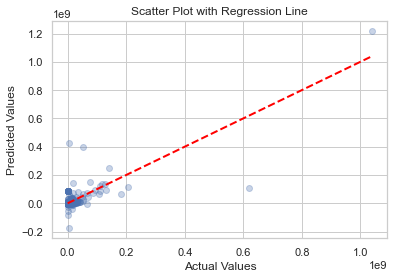

In [108]:
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


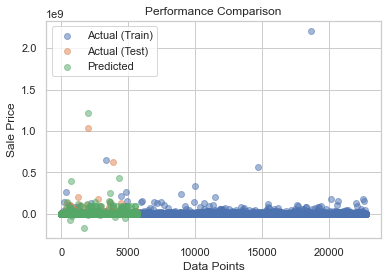

In [109]:
# Performance Comparison Plot
plt.scatter(range(len(y_train)), y_train, label='Actual (Train)', alpha=0.5)
plt.scatter(range(len(y_test)), y_test, label='Actual (Test)', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.title('Performance Comparison')
plt.xlabel('Data Points')
plt.ylabel('Sale Price')
plt.show()

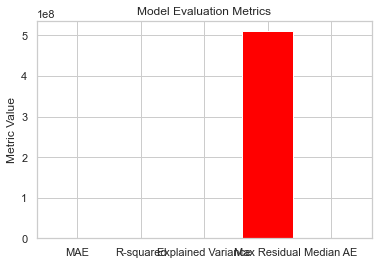

In [110]:
# Metrics Comparison Bar Plot
metrics_names = ['MAE', 'R-squared', 'Explained Variance', 'Max Residual', 'Median AE']
metrics_values = [mae, r2, explained_var, max_residual, median_ae]
plt.bar(metrics_names, metrics_values, color=['green', 'orange', 'purple', 'red', 'brown'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Metric Value')
plt.show()

In [111]:
# Linear Regression on GROSS SQUARE FEET
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

X = real_estate_price_df_encoded['GROSS SQUARE FEET']
y = real_estate_price_df_encoded['SALE PRICE']
# Reshape the input data to 2D array
X = X.values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Explained Variance Score: {explained_var:.2f}')
print(f'Maximum Residual Error: {max_residual:.2f}')
print(f'Median Absolute Error: {median_ae:.2f}')

Mean Squared Error (MSE): 149623544146030.88
Mean Absolute Error (MAE): 1382152.65
R-squared (R2): 0.51
Explained Variance Score: 0.51
Maximum Residual Error: 679012110.35
Median Absolute Error: 491399.34


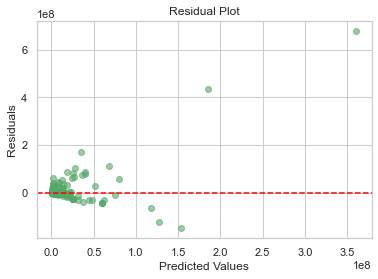

In [112]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.scatter(y_pred, residuals, c='g', alpha=0.6)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

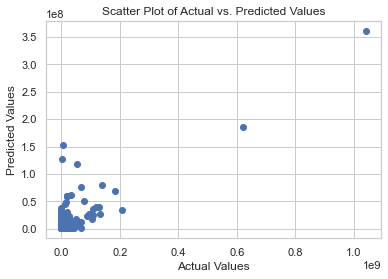

In [113]:
# Scatter Plot
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

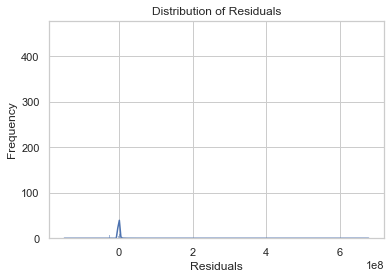

In [114]:
# Distribution Plot
sns.histplot(y_test - y_pred, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

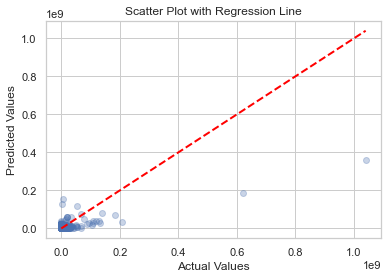

In [115]:
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

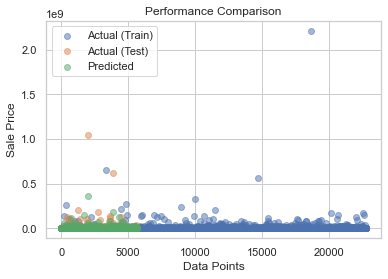

In [116]:
# Performance Comparison Plot
plt.scatter(range(len(y_train)), y_train, label='Actual (Train)', alpha=0.5)
plt.scatter(range(len(y_test)), y_test, label='Actual (Test)', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.title('Performance Comparison')
plt.xlabel('Data Points')
plt.ylabel('Sale Price')
plt.show()

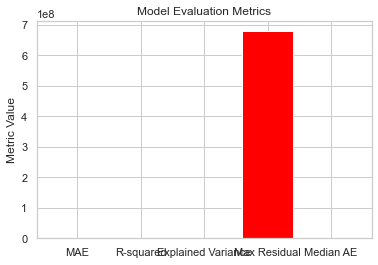

In [118]:
# Metrics Comparison Bar Plot
metrics_names = ['MAE', 'R-squared', 'Explained Variance', 'Max Residual', 'Median AE']
metrics_values = [mae, r2, explained_var, max_residual, median_ae]
plt.bar(metrics_names, metrics_values, color=['green', 'orange', 'purple', 'red', 'brown'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Metric Value')
plt.show()

In [93]:
# Try Linear Regression on GROSS SQUARE FEET and TOTAL UNITS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

X = real_estate_price_df_encoded[['TOTAL UNITS', 'GROSS SQUARE FEET']]
y = real_estate_price_df_encoded['SALE PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Explained Variance Score: {explained_var:.2f}')
print(f'Maximum Residual Error: {max_residual:.2f}')
print(f'Median Absolute Error: {median_ae:.2f}')


Mean Squared Error (MSE): 139070168737840.92
Mean Absolute Error (MAE): 1535408.61
R-squared (R2): 0.54
Explained Variance Score: 0.54
Maximum Residual Error: 538656167.64
Median Absolute Error: 606237.63


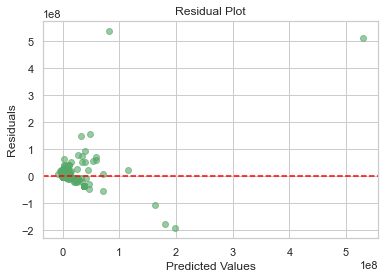

In [95]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.scatter(y_pred, residuals, c='g', alpha=0.6)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()


# The residuals exhibit randomness which indicates their independence. The main block of residual points resides around 0. 

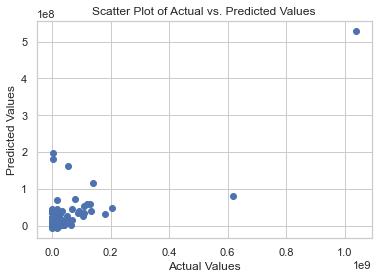

In [96]:
# Scatter Plot
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

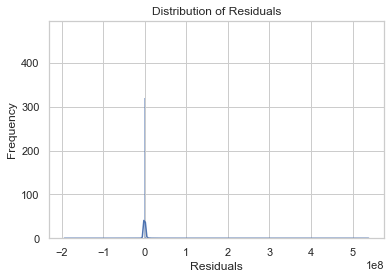

In [97]:
# Distribution Plot
sns.histplot(y_test - y_pred, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

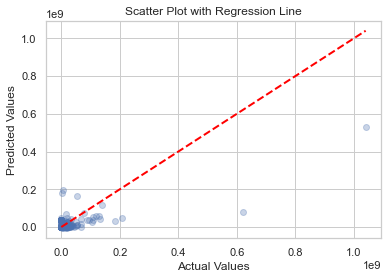

In [103]:
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


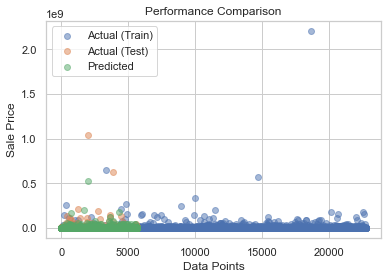

In [100]:
# Performance Comparison Plot
plt.scatter(range(len(y_train)), y_train, label='Actual (Train)', alpha=0.5)
plt.scatter(range(len(y_test)), y_test, label='Actual (Test)', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.title('Performance Comparison')
plt.xlabel('Data Points')
plt.ylabel('Sale Price')
plt.show()


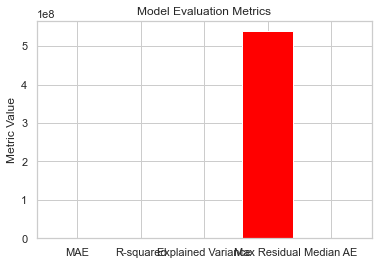

In [102]:
# Metrics Comparison Bar Plot
metrics_names = ['MAE', 'R-squared', 'Explained Variance', 'Max Residual', 'Median AE']
metrics_values = [mae, r2, explained_var, max_residual, median_ae]
plt.bar(metrics_names, metrics_values, color=['green', 'orange', 'purple', 'red', 'brown'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Metric Value')
plt.show()

# Try Decision Tree

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
model_decision_tree = DecisionTreeRegressor(random_state=42)
model_decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_decision_tree.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_residual}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 28495653781144.03
Mean Absolute Error (MAE): 874288.1754216434
R-squared (R2): 0.42873641936117024
Explained Variance Score: 0.4287532798778386
Maximum Residual Error: 220000000.0
Median Absolute Error: 223550.0


# Try Random Forest

In [73]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# Initialize and train the Random Forest Regressor
model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_random_forest.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_residual}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 26042280118408.414
Mean Absolute Error (MAE): 775307.5338486986
R-squared (R2): 0.5873538937025908
Explained Variance Score: 0.5873993267307127
Maximum Residual Error: 234146834.95
Median Absolute Error: 188556.96000000002
CPU times: total: 6.69 s
Wall time: 7.29 s


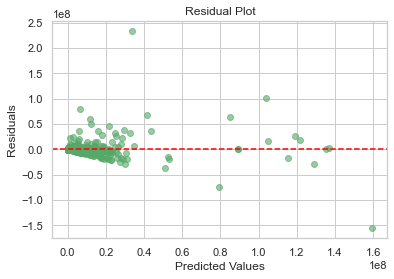

In [74]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.scatter(y_pred, residuals, c='g', alpha=0.6)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

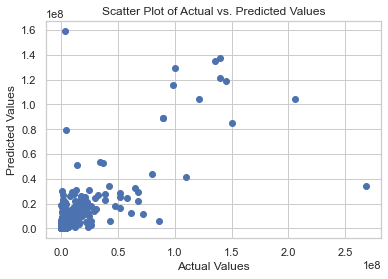

In [75]:
# Scatter Plot
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

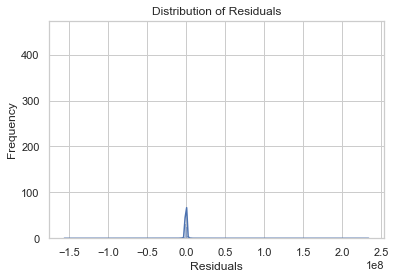

In [76]:
# Distribution Plot
sns.histplot(y_test - y_pred, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

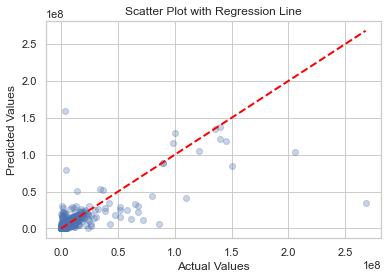

In [77]:
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


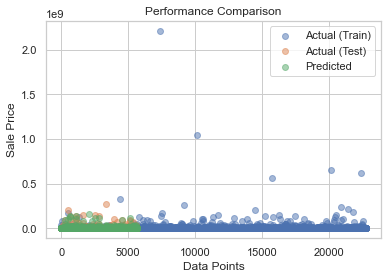

In [78]:
# Performance Comparison Plot
plt.scatter(range(len(y_train)), y_train, label='Actual (Train)', alpha=0.5)
plt.scatter(range(len(y_test)), y_test, label='Actual (Test)', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.title('Performance Comparison')
plt.xlabel('Data Points')
plt.ylabel('Sale Price')
plt.show()

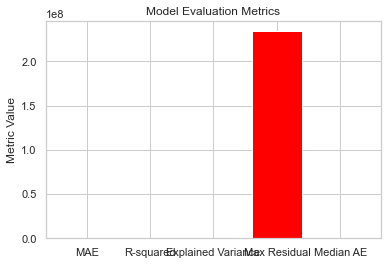

In [79]:
# Metrics Comparison Bar Plot
metrics_names = ['MAE', 'R-squared', 'Explained Variance', 'Max Residual', 'Median AE']
metrics_values = [mae, r2, explained_var, max_residual, median_ae]
plt.bar(metrics_names, metrics_values, color=['green', 'orange', 'purple', 'red', 'brown'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Metric Value')
plt.show()

In [81]:
import numpy as np

# Create a new data df with one additional residential unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() + 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 1,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")


Predicted Sale Price for the New Data Point: $12693147.12


In [82]:
import numpy as np

# Create a new data df with one less residential unit than mean
one_unit_less = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() - 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 1,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_less_df = pd.DataFrame([one_unit_less])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_less_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: {predicted_price[0]}")

Predicted Sale Price for the New Data Point: 13619417.14


In [83]:
feature_importances = model_random_forest.feature_importances_
print("Feature Importance Scores:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


Feature Importance Scores:
RESIDENTIAL UNITS: 0.02383763156391659
COMMERCIAL UNITS: 0.08550317973383965
TOTAL UNITS: 0.06129051610973309
LAND SQUARE FEET: 0.09647072260352756
GROSS SQUARE FEET: 0.6979472731887629
BOROUGH_1: 0.02623194329742335
BOROUGH_2: 0.0018769358019488898
BOROUGH_3: 0.0008134735907364808
BOROUGH_4: 0.005571749674531837
BOROUGH_5: 0.00045657443557952135


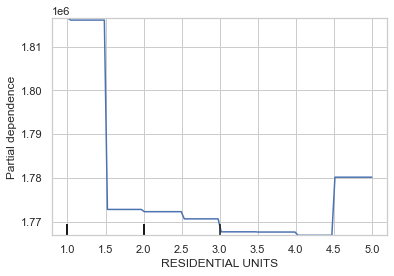

In [84]:
from sklearn.inspection import plot_partial_dependence

# Select the feature index for 'RESIDENTIAL UNITS'
feature_index = X.columns.get_loc('RESIDENTIAL UNITS')

# Create partial dependence plots
plot_partial_dependence(model_random_forest, X_train, features=[feature_index], target='SALE PRICE')


In [85]:
import numpy as np

# Create a new data df with one additional residential unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() + 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 1,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $583473.49


In [86]:
import numpy as np

# Create a new data df with one less residential unit than mean
one_unit_less = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() - 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 1,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_less_df = pd.DataFrame([one_unit_less])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_less_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $669737.74


In [104]:
import numpy as np

# Create a new data df with one additional residential unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() + 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 1,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $1663263.7914285713


In [105]:
import numpy as np

# Create a new data df with one less residential unit than mean
one_unit_less = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() - 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 1,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_less_df = pd.DataFrame([one_unit_less])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_less_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $1095173.5571428572


In [106]:
import numpy as np

# Create a new data df with one additional residential unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() + 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 1,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $1260107.65


In [107]:
import numpy as np

# Create a new data df with one less residential unit than mean
one_unit_less = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() - 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 1,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_less_df = pd.DataFrame([one_unit_less])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_less_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $1182891.9


In [108]:
import numpy as np

# Create a new data df with one additional residential unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() + 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 1
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $614241.55


In [109]:
import numpy as np

# Create a new data df with one less residential unit than mean
one_unit_less = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean() - 1,
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 1
}

# Convert the new data point to a DataFrame
one_unit_less_df = pd.DataFrame([one_unit_less])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_less_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $857385.06


In [87]:
import numpy as np

# Create a new data df with one additional commercial unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() + 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 1,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")


Predicted Sale Price for the New Data Point: $13185238.05


In [93]:
import numpy as np

# Create a new data df with one less commercial unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() - 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 1,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $14735632.62


In [94]:
import numpy as np

# Create a new data df with one additional commercial unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() + 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 1,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $643224.76


In [95]:
import numpy as np

# Create a new data df with one less commercial unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() - 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 1,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $643347.62


In [96]:
import numpy as np

# Create a new data df with one additional commercial unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() + 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 1,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $1647062.06


In [97]:
import numpy as np

# Create a new data df with one less commercial unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() - 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 1,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $1134386.2771428572


In [98]:
import numpy as np

# Create a new data df with one more commercial unit than mean
one_unit_less = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() + 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 1,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_less_df = pd.DataFrame([one_unit_less])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_less_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $1339586.33


In [101]:
import numpy as np

# Create a new data df with one less commercial unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() - 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 1,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $1041043.13


In [102]:
import numpy as np

# Create a new data df with one more commercial unit than mean
one_unit_less = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() + 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 1
}

# Convert the new data point to a DataFrame
one_unit_less_df = pd.DataFrame([one_unit_less])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_less_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $646237.26


In [103]:
import numpy as np

# Create a new data df with one less commercial unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() - 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 1
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $706012.26


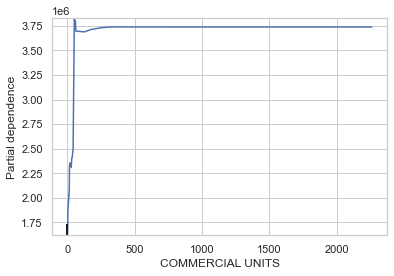

In [89]:
from sklearn.inspection import plot_partial_dependence

# Select the feature index for 'Commercial UNITS'
feature_index = X.columns.get_loc('COMMERCIAL UNITS')

# Create partial dependence plots
plot_partial_dependence(model_random_forest, X_train, features=[feature_index], target='SALE PRICE')

In [110]:
# Create a new data point with 1,000 less gross square feet than the mean
less_sqft_data_point = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean(),
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean() - 1000,
    'BOROUGH_1': 1,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
less_sqft_df = pd.DataFrame([less_sqft_data_point])

# Make predictions using the trained Random Forest Regressor
predicted_price_less_sqft = model_random_forest.predict(less_sqft_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point (1,000 less sqft): ${predicted_price_less_sqft[0]}")


Predicted Sale Price for the New Data Point (1,000 less sqft): $8216884.07


In [111]:
# Create a new data point with 1,000 more gross square feet than the mean
more_sqft_data_point = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean(),
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean() + 1000,
    'BOROUGH_1': 1,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
more_sqft_df = pd.DataFrame([more_sqft_data_point])

# Make predictions using the trained Random Forest Regressor
predicted_price_more_sqft = model_random_forest.predict(more_sqft_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point (1,000 more sqft): ${predicted_price_more_sqft[0]}")


Predicted Sale Price for the New Data Point (1,000 more sqft): $19273101.05


In [112]:
# Create a new data point with 300 less gross square feet than the mean
less_sqft_data_point = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean(),
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean() - 300,
    'BOROUGH_1': 1,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
less_sqft_df = pd.DataFrame([less_sqft_data_point])

# Make predictions using the trained Random Forest Regressor
predicted_price_less_sqft = model_random_forest.predict(less_sqft_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point (1,000 less sqft): ${predicted_price_less_sqft[0]}")


Predicted Sale Price for the New Data Point (1,000 less sqft): $13750465.283333335


In [113]:
# Create a new data point with 300 more gross square feet than the mean
more_sqft_data_point = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean(),
    'TOTAL UNITS': X['TOTAL UNITS'].mean(),
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean() + 300,
    'BOROUGH_1': 1,
    'BOROUGH_2': 0,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
more_sqft_df = pd.DataFrame([more_sqft_data_point])

# Make predictions using the trained Random Forest Regressor
predicted_price_more_sqft = model_random_forest.predict(more_sqft_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point (1,000 more sqft): ${predicted_price_more_sqft[0]}")

Predicted Sale Price for the New Data Point (1,000 more sqft): $17790461.31


In [90]:
import numpy as np

# Create a new data df with one additional commercial unit more than mean
one_unit_more = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() + 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() + 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 1,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_more_df = pd.DataFrame([one_unit_more])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_more_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $643224.76


In [91]:
import numpy as np

# Create a new data df with one less commercial unit than mean
one_unit_less = {
    'RESIDENTIAL UNITS': X['RESIDENTIAL UNITS'].mean(),
    'COMMERCIAL UNITS': X['COMMERCIAL UNITS'].mean() - 1,
    'TOTAL UNITS': X['TOTAL UNITS'].mean() - 1,
    'LAND SQUARE FEET': X['LAND SQUARE FEET'].mean(),
    'GROSS SQUARE FEET': X['GROSS SQUARE FEET'].mean(),
    'BOROUGH_1': 0,
    'BOROUGH_2': 1,
    'BOROUGH_3': 0,
    'BOROUGH_4': 0,
    'BOROUGH_5': 0
}

# Convert the new data point to a DataFrame
one_unit_less_df = pd.DataFrame([one_unit_less])

# Make predictions using the trained Random Forest Regressor
predicted_price = model_random_forest.predict(one_unit_less_df)

# Display the predicted sale price
print(f"Predicted Sale Price for the New Data Point: ${predicted_price[0]}")

Predicted Sale Price for the New Data Point: $643347.62


# Try SVR

In [103]:
%%time
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Support Vector Regressor
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_svr.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_residual}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 53364999706004.79
Mean Absolute Error (MAE): 1087655.4097198863
R-squared (R2): -0.014263302870199057
Explained Variance Score: 1.2646753423495305e-05
Maximum Residual Error: 256865218.03873628
Median Absolute Error: 238638.81921199046
CPU times: total: 28.1 s
Wall time: 32.4 s


# Try kNN Regressor

In [104]:
%%time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the k-Nearest Neighbors Regressor
k = 5  # You can adjust the value of k
model_knn = KNeighborsRegressor(n_neighbors=k)
model_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_knn.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_residual}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 69611255467263.29
Mean Absolute Error (MAE): 899918.9297906036
R-squared (R2): 0.4034883536265532
Explained Variance Score: 0.40356793373796074
Maximum Residual Error: 471031816.6
Median Absolute Error: 190300.0
CPU times: total: 375 ms
Wall time: 501 ms


# Try Lasso Regression

In [105]:
%%time
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Lasso Regression model
alpha = 0.01  # You can adjust the regularization strength
model_lasso = Lasso(alpha=alpha)
model_lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_lasso.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_residual}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 65060404002762.15
Mean Absolute Error (MAE): 1358471.8190209807
R-squared (R2): 0.07084038716920427
Explained Variance Score: 0.07125492073213757
Maximum Residual Error: 309972630.0916606
Median Absolute Error: 465813.64168509934
CPU times: total: 453 ms
Wall time: 298 ms


# Try Ridge Regression

In [126]:
%%time
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Ridge Regression model
alpha = 0.01  # You can adjust the regularization strength
model_ridge = Ridge(alpha=alpha)
model_ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_ridge.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_residual}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 50297199319095.74
Mean Absolute Error (MAE): 1321224.6874237244
R-squared (R2): 0.5286346594630149
Explained Variance Score: 0.5287917340289177
Maximum Residual Error: 244856109.4587102
Median Absolute Error: 469387.2206523707
CPU times: total: 0 ns
Wall time: 141 ms


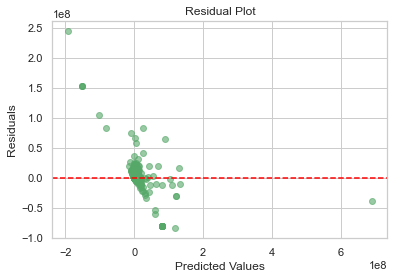

In [127]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.scatter(y_pred, residuals, c='g', alpha=0.6)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

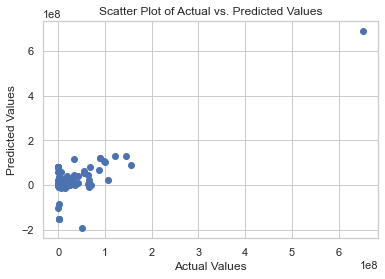

In [128]:
# Scatter Plot
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

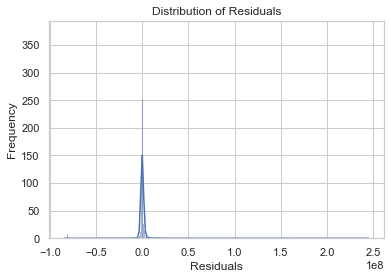

In [129]:
# Distribution Plot
sns.histplot(y_test - y_pred, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

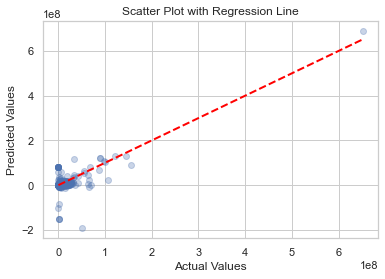

In [130]:
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

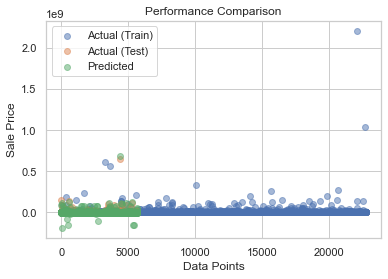

In [133]:
# Performance Comparison Plot
plt.scatter(range(len(y_train)), y_train, label='Actual (Train)', alpha=0.5)
plt.scatter(range(len(y_test)), y_test, label='Actual (Test)', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.title('Performance Comparison')
plt.xlabel('Data Points')
plt.ylabel('Sale Price')
plt.show()

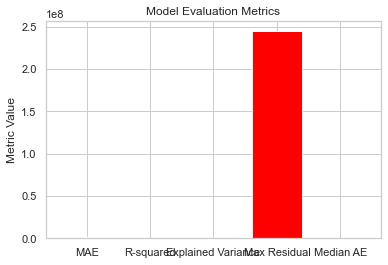

In [132]:
# Metrics Comparison Bar Plot
metrics_names = ['MAE', 'R-squared', 'Explained Variance', 'Max Residual', 'Median AE']
metrics_values = [mae, r2, explained_var, max_residual, median_ae]
plt.bar(metrics_names, metrics_values, color=['green', 'orange', 'purple', 'red', 'brown'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Metric Value')
plt.show()

# Try Elastic Net Regression

In [107]:
%%time
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Elastic Net Regression model
alpha = 0.01  # You can adjust the regularization strength
l1_ratio = 0.5  # You can adjust the balance between L1 and L2 regularization
model_en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
model_en.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_en.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_residual = max_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Maximum Residual Error: {max_residual}")
print(f"Median Absolute Error: {median_ae}")


Mean Squared Error (MSE): 151822233675479.1
Mean Absolute Error (MAE): 1696338.3263050753
R-squared (R2): 0.1688183981854715
Explained Variance Score: 0.168907993904035
Maximum Residual Error: 556148363.0909563
Median Absolute Error: 483345.95216699643
CPU times: total: 188 ms
Wall time: 112 ms


# Try tuning RandomForest

In [134]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.model_selection import GridSearchCV
# Separate features and target variable
X = real_estate_price_df_encoded.drop('SALE PRICE', axis=1)
y = real_estate_price_df_encoded['SALE PRICE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the random forest model with the best parameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Maximum Residual Error: {max_err}")
print(f"Median Absolute Error: {med_ae}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error (MSE): 24172237304663.914
Mean Absolute Error (MAE): 789729.4074409158
R-squared (R2): 0.5405787804467665
Explained Variance Score: 0.5406321471820843
Maximum Residual Error: 226445484.61338624
Median Absolute Error: 180488.18492063496
CPU times: total: 12.3 s
Wall time: 7min 37s


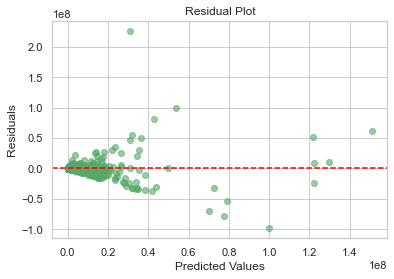

In [135]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.scatter(y_pred, residuals, c='g', alpha=0.6)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

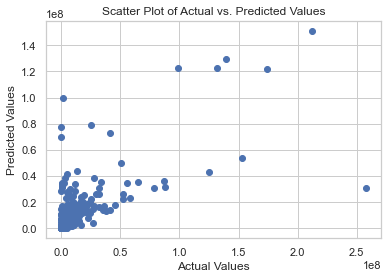

In [136]:
# Scatter Plot
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

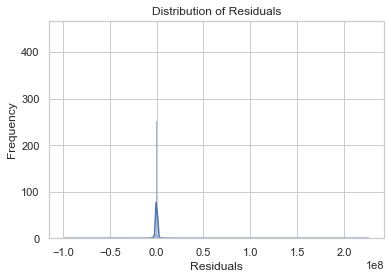

In [137]:
# Distribution Plot
sns.histplot(y_test - y_pred, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

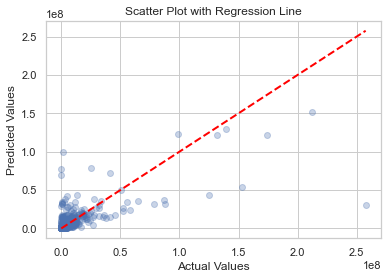

In [138]:
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

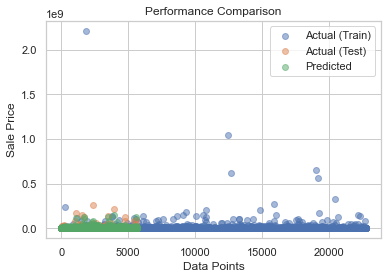

In [139]:
# Performance Comparison Plot
plt.scatter(range(len(y_train)), y_train, label='Actual (Train)', alpha=0.5)
plt.scatter(range(len(y_test)), y_test, label='Actual (Test)', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.title('Performance Comparison')
plt.xlabel('Data Points')
plt.ylabel('Sale Price')
plt.show()

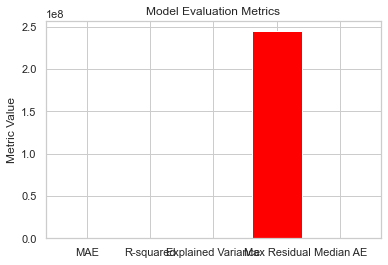

In [140]:
# Metrics Comparison Bar Plot
metrics_names = ['MAE', 'R-squared', 'Explained Variance', 'Max Residual', 'Median AE']
metrics_values = [mae, r2, explained_var, max_residual, median_ae]
plt.bar(metrics_names, metrics_values, color=['green', 'orange', 'purple', 'red', 'brown'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Metric Value')
plt.show()

# Try tuning Ridge Regression

In [109]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.model_selection import GridSearchCV


# Separate features and target variable
X = real_estate_price_df_encoded.drop('SALE PRICE', axis=1)
y = real_estate_price_df_encoded['SALE PRICE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the Ridge Regression model with the best parameters
best_ridge_model = Ridge(**best_params)
best_ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_ridge_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Maximum Residual Error: {max_err}")
print(f"Median Absolute Error: {med_ae}")


Best Hyperparameters: {'alpha': 100}
Mean Squared Error (MSE): 70716946459186.44
Mean Absolute Error (MAE): 1430639.1468653432
R-squared (R2): -0.4870235096423594
Explained Variance Score: -0.48690927330061395
Maximum Residual Error: 303048846.84214133
Median Absolute Error: 483846.73698667856
CPU times: total: 31.2 ms
Wall time: 196 ms


In [110]:
%%time
from sklearn.linear_model import RidgeCV
import numpy as np

# Use RidgeCV for cross-validated alpha selection
alphas = np.logspace(-6, 6, 13)
model_ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
model_ridge_cv.fit(X_train_scaled, y_train)

# Get the best alpha
best_alpha = model_ridge_cv.alpha_

# Initialize and train the Ridge Regression model with the best alpha
model_ridge_tuned = Ridge(alpha=best_alpha)
model_ridge_tuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_tuned = model_ridge_tuned.predict(X_test_scaled)

# Evaluate the performance
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
explained_var_tuned = explained_variance_score(y_test, y_pred_tuned)
max_residual_tuned = max_error(y_test, y_pred_tuned)
median_ae_tuned = median_absolute_error(y_test, y_pred_tuned)

# Display the metrics for the tuned model
print("Metrics for Tuned Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_tuned}")
print(f"Mean Absolute Error (MAE): {mae_tuned}")
print(f"R-squared (R2): {r2_tuned}")
print(f"Explained Variance Score: {explained_var_tuned}")
print(f"Maximum Residual Error: {max_residual_tuned}")
print(f"Median Absolute Error: {median_ae_tuned}")


Metrics for Tuned Ridge Regression:
Mean Squared Error (MSE): 47629055053150.3
Mean Absolute Error (MAE): 1679933.9389470324
R-squared (R2): -0.0015353907703143932
Explained Variance Score: 0.00023881047306284486
Maximum Residual Error: 328109215.03413844
Median Absolute Error: 1170688.38013359
CPU times: total: 359 ms
Wall time: 348 ms


In [111]:
# Get feature coefficients from the tuned Ridge Regression model
feature_coefficients = model_ridge_tuned.coef_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': feature_coefficients
})

# Display feature importance
print("Feature Importance:")
print(feature_importance_df.sort_values(by='Coefficient', ascending=False))


Feature Importance:
             Feature   Coefficient
9          BOROUGH_5  53843.822412
4  GROSS SQUARE FEET   3844.909468
3   LAND SQUARE FEET   2030.988662
1   COMMERCIAL UNITS  -6325.196937
8          BOROUGH_4  -7232.477079
0  RESIDENTIAL UNITS  -7697.732528
7          BOROUGH_3  -8025.075479
2        TOTAL UNITS  -8854.302077
5          BOROUGH_1 -17614.582785
6          BOROUGH_2 -30769.869580


# Try XGBoost Regression

In [112]:
%%time
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the XGBoost Regressor
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgboost = model_xgboost.predict(X_test_scaled)

# Evaluate the performance
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)
explained_var_xgboost = explained_variance_score(y_test, y_pred_xgboost)
max_residual_xgboost = max_error(y_test, y_pred_xgboost)
median_ae_xgboost = median_absolute_error(y_test, y_pred_xgboost)

print("Metrics for XGBoost Regression:")
print(f"Mean Squared Error (MSE): {mse_xgboost}")
print(f"Mean Absolute Error (MAE): {mae_xgboost}")
print(f"R-squared (R2): {r2_xgboost}")
print(f"Explained Variance Score: {explained_var_xgboost}")
print(f"Maximum Residual Error: {max_residual_xgboost}")
print(f"Median Absolute Error: {median_ae_xgboost}")


Metrics for XGBoost Regression:
Mean Squared Error (MSE): 711264446407468.1
Mean Absolute Error (MAE): 1349469.3190381401
R-squared (R2): 0.3576518616760782
Explained Variance Score: 0.35773578084573754
Maximum Residual Error: 1903387456.0
Median Absolute Error: 186047.1875
CPU times: total: 766 ms
Wall time: 735 ms


# Try bagged regression with RandomForest

In [113]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Regressor
model_rf = RandomForestRegressor()
bagged_model_rf = BaggingRegressor(base_estimator=model_rf, n_estimators=10, random_state=82)
bagged_model_rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf_bagged = bagged_model_rf.predict(X_test_scaled)

# Evaluate the performance
mse_rf_bagged = mean_squared_error(y_test, y_pred_rf_bagged)
mae_rf_bagged = mean_absolute_error(y_test, y_pred_rf_bagged)
r2_rf_bagged = r2_score(y_test, y_pred_rf_bagged)
explained_var_rf_bagged = explained_variance_score(y_test, y_pred_rf_bagged)
max_residual_rf_bagged = max_error(y_test, y_pred_rf_bagged)
median_ae_rf_bagged = median_absolute_error(y_test, y_pred_rf_bagged)

print("Metrics for Bagged Random Forest Regression:")
print(f"Mean Squared Error (MSE): {mse_rf_bagged}")
print(f"Mean Absolute Error (MAE): {mae_rf_bagged}")
print(f"R-squared (R2): {r2_rf_bagged}")
print(f"Explained Variance Score: {explained_var_rf_bagged}")
print(f"Maximum Residual Error: {max_residual_rf_bagged}")
print(f"Median Absolute Error: {median_ae_rf_bagged}")


Metrics for Bagged Random Forest Regression:
Mean Squared Error (MSE): 40830452373268.08
Mean Absolute Error (MAE): 840626.6911749778
R-squared (R2): 0.3436529360153082
Explained Variance Score: 0.3436944824052329
Maximum Residual Error: 278410760.62818587
Median Absolute Error: 181844.07421428582


# Try Neural Network with Hyperparameter Tuning

In [115]:
'''
%%time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

# Assuming X and y are your feature matrix and target variable
X = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)
y = real_estate_price_df_encoded["SALE PRICE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential([
        Dense(units=neurons, activation=activation, input_dim=X_train_scaled.shape[1]),
        Dense(units=1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create a KerasRegressor with your neural network model
model_nn = KerasRegressor(build_fn=create_model, epochs=50, batch_size=66, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': [32, 64, 128]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_nn, param_grid=param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=3)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
y_pred_nn = grid_result.predict(X_test_scaled)

# Evaluate the performance
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
explained_var_nn = explained_variance_score(y_test, y_pred_nn)
max_residual_nn = max_error(y_test, y_pred_nn)
median_ae_nn = median_absolute_error(y_test, y_pred_nn)

# Print the metrics
print("Metrics for Neural Network Regression:")
print("Mean Squared Error (MSE):", mse_nn)
print("Mean Absolute Error (MAE):", mae_nn)
print("R-squared (R2):", r2_nn)
print("Explained Variance Score:", explained_var_nn)
print("Maximum Residual Error:", max_residual_nn)
print("Median Absolute Error:", median_ae_nn)
'''


'\n%%time\nimport numpy as np\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.preprocessing import StandardScaler\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.wrappers.scikit_learn import KerasRegressor\nfrom sklearn.metrics import make_scorer, mean_squared_error\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error\n\n# Assuming X and y are your feature matrix and target variable\nX = real_estate_price_df_encoded.drop("SALE PRICE", axis=1)\ny = real_estate_price_df_encoded["SALE PRICE"]\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)\n\n# Standardize the features\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_

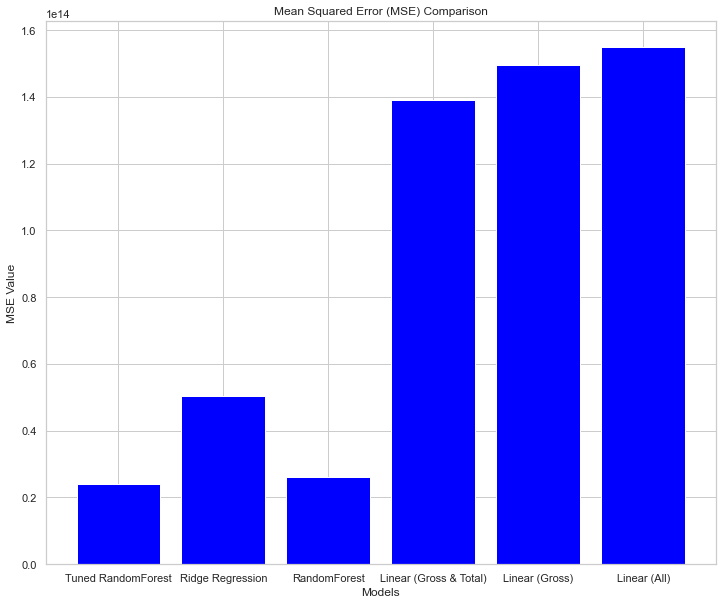

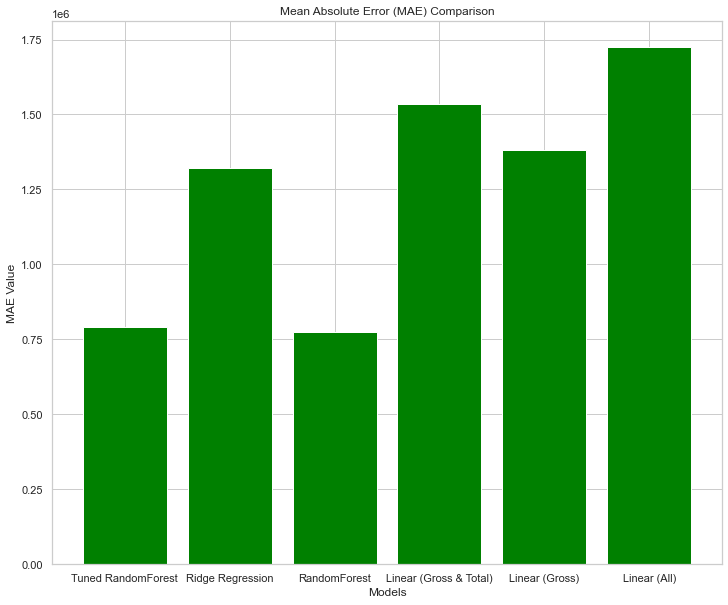

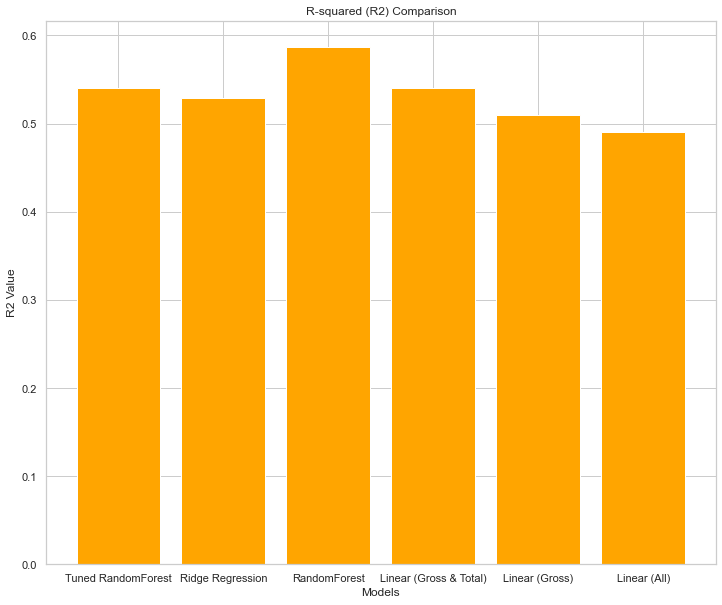

In [117]:
import matplotlib.pyplot as plt

models = ['Tuned RandomForest', 'Ridge Regression', 'RandomForest', 'Linear (Gross & Total)', 'Linear (Gross)', 'Linear (All)']
mse_values = [24172237304663.914, 50297199319095.74, 26042280118408.414, 139070168737840.92, 149623544146030.88, 155075890534231.84]
mae_values = [789729.41, 1321224.69, 775307.53, 1535408.61, 1382152.65, 1726621.12]
r2_values = [0.5406, 0.5286, 0.5874, 0.54, 0.51, 0.49]

# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(12, 10))
plt.bar(models, mse_values, color='blue')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE Value')
plt.show()

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(12, 10))
plt.bar(models, mae_values, color='green')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Models')
plt.ylabel('MAE Value')
plt.show()

# Plotting R-squared (R2)
plt.figure(figsize=(12, 10))
plt.bar(models, r2_values, color='orange')
plt.title('R-squared (R2) Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Value')
plt.show()




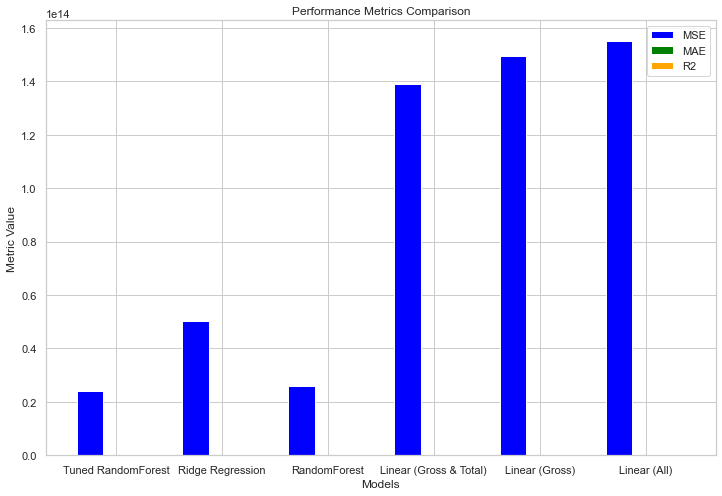

In [118]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Tuned RandomForest', 'Ridge Regression', 'RandomForest', 'Linear (Gross & Total)', 'Linear (Gross)', 'Linear (All)']
mse_values = [24172237304663.914, 50297199319095.74, 26042280118408.414, 139070168737840.92, 149623544146030.88, 155075890534231.84]
mae_values = [789729.41, 1321224.69, 775307.53, 1535408.61, 1382152.65, 1726621.12]
r2_values = [0.5406, 0.5286, 0.5874, 0.54, 0.51, 0.49]

bar_width = 0.25
index = np.arange(len(models))

# Plotting all metrics
plt.figure(figsize=(12, 8))

plt.bar(index - bar_width, mse_values, bar_width, label='MSE', color='blue')
plt.bar(index, mae_values, bar_width, label='MAE', color='green')
plt.bar(index + bar_width, r2_values, bar_width, label='R2', color='orange')

plt.title('Performance Metrics Comparison')
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.xticks(index, models)
plt.legend()
plt.show()



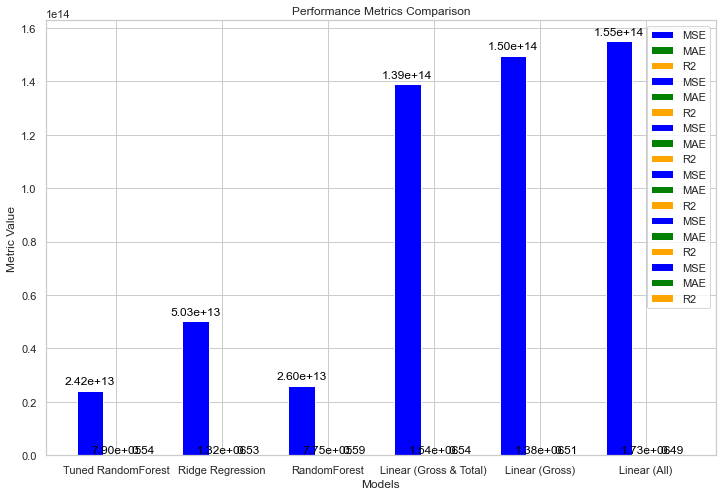

In [119]:

import matplotlib.pyplot as plt
import numpy as np

models = ['Tuned RandomForest', 'Ridge Regression', 'RandomForest', 'Linear (Gross & Total)', 'Linear (Gross)', 'Linear (All)']
mse_values = [24172237304663.914, 50297199319095.74, 26042280118408.414, 139070168737840.92, 149623544146030.88, 155075890534231.84]
mae_values = [789729.41, 1321224.69, 775307.53, 1535408.61, 1382152.65, 1726621.12]
r2_values = [0.5406, 0.5286, 0.5874, 0.54, 0.51, 0.49]

bar_width = 0.25
index = np.arange(len(models))

# Plotting all metrics with numerical values on top
plt.figure(figsize=(12, 8))

for i, model in enumerate(models):
    plt.bar(index[i] - bar_width, mse_values[i], bar_width, label='MSE', color='blue')
    plt.text(index[i] - bar_width, mse_values[i] + 0.01 * max(mse_values), f'{mse_values[i]:.2e}', ha='center', va='bottom', color='black')

    plt.bar(index[i], mae_values[i], bar_width, label='MAE', color='green')
    plt.text(index[i], mae_values[i] + 0.01 * max(mae_values), f'{mae_values[i]:.2e}', ha='center', va='bottom', color='black')

    plt.bar(index[i] + bar_width, r2_values[i], bar_width, label='R2', color='orange')
    plt.text(index[i] + bar_width, r2_values[i] + 0.01 * max(r2_values), f'{r2_values[i]:.2f}', ha='center', va='bottom', color='black')

plt.title('Performance Metrics Comparison')
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.xticks(index, models)
plt.legend()
plt.show()


In [120]:
!pip install tabulate
from tabulate import tabulate

# Assuming you have the metrics in a dictionary
metrics_dict = {
    'Model': models,
    'Mean Squared Error (MSE)': mse_values,
    'Mean Absolute Error (MAE)': mae_values,
    'R-squared (R2)': r2_values
}

# Convert the dictionary to a table
table = tabulate(metrics_dict, headers='keys', tablefmt='pretty')

# Print the table
print(table)


+------------------------+--------------------------+---------------------------+----------------+
|         Model          | Mean Squared Error (MSE) | Mean Absolute Error (MAE) | R-squared (R2) |
+------------------------+--------------------------+---------------------------+----------------+
|   Tuned RandomForest   |    24172237304663.914    |         789729.41         |     0.5406     |
|    Ridge Regression    |    50297199319095.74     |        1321224.69         |     0.5286     |
|      RandomForest      |    26042280118408.414    |         775307.53         |     0.5874     |
| Linear (Gross & Total) |    139070168737840.92    |        1535408.61         |      0.54      |
|     Linear (Gross)     |    149623544146030.88    |        1382152.65         |      0.51      |
|      Linear (All)      |    155075890534231.84    |        1726621.12         |      0.49      |
+------------------------+--------------------------+---------------------------+----------------+



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
from tabulate import tabulate

# Assuming you have the metrics in a dictionary
metrics_dict = {
    'Model': models,
    'Mean Squared Error (MSE)': mse_values,
    'Mean Absolute Error (MAE)': mae_values,
    'R-squared (R2)': r2_values
}

# Convert the dictionary to a table with pretty formatting
table = tabulate(metrics_dict, headers='keys', tablefmt='pretty')

# Print the table
print(table)



+------------------------+--------------------------+---------------------------+----------------+
|         Model          | Mean Squared Error (MSE) | Mean Absolute Error (MAE) | R-squared (R2) |
+------------------------+--------------------------+---------------------------+----------------+
|   Tuned RandomForest   |    24172237304663.914    |         789729.41         |     0.5406     |
|    Ridge Regression    |    50297199319095.74     |        1321224.69         |     0.5286     |
|      RandomForest      |    26042280118408.414    |         775307.53         |     0.5874     |
| Linear (Gross & Total) |    139070168737840.92    |        1535408.61         |      0.54      |
|     Linear (Gross)     |    149623544146030.88    |        1382152.65         |      0.51      |
|      Linear (All)      |    155075890534231.84    |        1726621.12         |      0.49      |
+------------------------+--------------------------+---------------------------+----------------+


In [93]:


|                           | 1 Residential Unit More Than the Mean | One Residential Unit Less Than the Mean | One Commercial Unit More Than the Mean | One Commercial Unit Less Than the Mean |
|---------------------------|----------------------------------------|----------------------------------------|----------------------------------------|----------------------------------------|
| Manhattan                 | $12,693,147.12                         | $13,619,417.14                         | $13,185,238.05                         | $14,735,632.62                         |
| Bronx                     | $583,473.49                            | $669,737.74                            | $643,224.76                            | $643,347.62                            |
| Brooklyn                  | $1,663,263.79                          | $1,095,173.56                          | $1,647,062.06                          | $1,134,386.28                          |
| Queens                    | $1,260,107.65                          | $1,182,891.90                          | $1,339,586.33                          | $1,041,043.13                          |
| Staten Island             | $614,241.55                            | $857,385.06                            | $646,237.26                            | $706,012.26                            |


In [ ]:
Here is the table you requested:

| Borough | 1 Residential Unit More Than the Mean | One Residential Unit Less Than the Mean | One Commercial Unit More Than the Mean | One Commercial Unit Less Than the Mean |
|---------|--------------------------------------|----------------------------------------|---------------------------------------|---------------------------------------|
| Manhattan | \$12,693,147.12 | \$13,619,417.14 | \$13,185,238.05 | \$14,735,632.62 |
| Bronx | \$583,473.49 | \$669,737.74 | \$643,224.76 | \$643,347.62 |
| Brooklyn | \$1,663,263.79 | \$1,095,173.56 | \$1,647,062.06 | \$1,134,386.28 |
| Queens | \$1,260,107.65 | \$1,182,891.90 | \$1,339,586.33 | \$1,041,043.13 |
| Staten Island | \$614,241.55 | \$857,385.06 | \$646,237.26 | \$706,012.26 |

Please note that the values are in US dollars.

In [ ]:
Borough	1 Residential Unit More Than the Mean	One Residential Unit Less Than the Mean	One Commercial Unit More Than the Mean	One Commercial Unit Less Than the Mean
Manhattan	$12,693,147.12	$13,619,417.14	$13,185,238.05	$14,735,632.62
Bronx	$583,473.49	$669,737.74	$643,224.76	$643,347.62
Brooklyn	$1,663,263.79	$1,095,173.56	$1,647,062.06	$1,134,386.28
Queens	$1,260,107.65	$1,182,891.90	$1,339,586.33	$1,041,043.13
Staten Island	$614,241.55	$857,385.06	$646,237.26	$706,012.26

In [1]:
import pandas as pd
from IPython.display import display

# Define the data
data = {
    '1 Residential Unit More Than the Mean': ['$12,693,147.12', '$583,473.49', '$1,663,263.79', '$1,260,107.65', '$614,241.55'],
    'One Residential Unit Less Than the Mean': ['$13,619,417.14', '$669,737.74', '$1,095,173.56', '$1,182,891.90', '$857,385.06'],
    'One Commercial Unit More Than the Mean': ['$13,185,238.05', '$643,224.76', '$1,647,062.06', '$1,339,586.33', '$646,237.26'],
    'One Commercial Unit Less Than the Mean': ['$14,735,632.62', '$643,347.62', '$1,134,386.28', '$1,041,043.13', '$706,012.26']
}

# Define the row labels
row_labels = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

# Create the DataFrame
df = pd.DataFrame(data, index=row_labels)

# Display the DataFrame
display(df)


,1 Residential Unit More Than the Mean,One Residential Unit Less Than the Mean,One Commercial Unit More Than the Mean,One Commercial Unit Less Than the Mean
Manhattan,"$12,693,147.12","$13,619,417.14","$13,185,238.05","$14,735,632.62"
Bronx,"$583,473.49","$669,737.74","$643,224.76","$643,347.62"
Brooklyn,"$1,663,263.79","$1,095,173.56","$1,647,062.06","$1,134,386.28"
Queens,"$1,260,107.65","$1,182,891.90","$1,339,586.33","$1,041,043.13"
Staten Island,"$614,241.55","$857,385.06","$646,237.26","$706,012.26"
